# Predict #
To be re-inserted into main Jupyter Notebook after.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For neural networks.
import keras as kr
# For data frames.
import pandas as pd
# For numerical arrays.
import numpy as np
# For preprocessing data.
import sklearn.preprocessing as pre
# For splitting data sets.
import sklearn.model_selection as mod
# For whitening.
import sklearn.decomposition as dec
# to write to csv file
import csv

Using TensorFlow backend.


In [2]:
# Import sklearn for comparison too
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [3]:
# Load the dataset into a dataframe
data = pd.DataFrame(data = load_boston().data, columns= load_boston().feature_names)
# Add the house price
data["MEDV"] = load_boston().target
# Quick check that all is ok
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


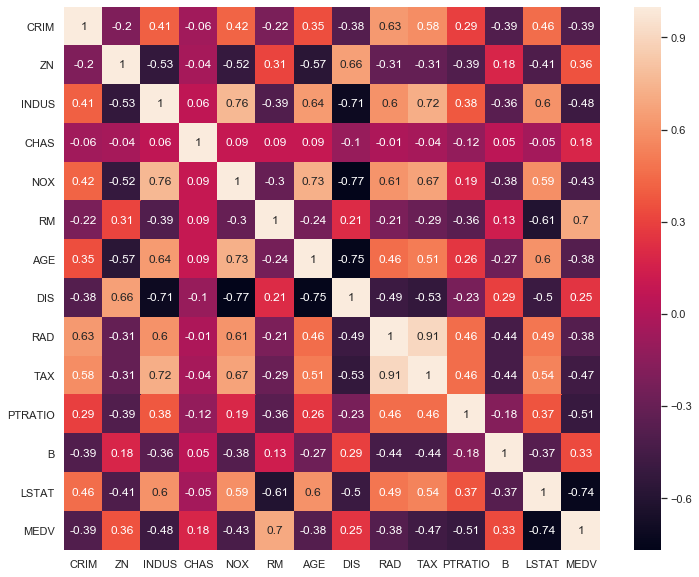

In [4]:
sns.set(rc={'figure.figsize':(12,10)})
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [5]:
correlation_matrix["MEDV"]

CRIM      -0.39
ZN         0.36
INDUS     -0.48
CHAS       0.18
NOX       -0.43
RM         0.70
AGE       -0.38
DIS        0.25
RAD       -0.38
TAX       -0.47
PTRATIO   -0.51
B          0.33
LSTAT     -0.74
MEDV       1.00
Name: MEDV, dtype: float64

In [6]:
cm = correlation_matrix.transform(func= lambda x: abs(x))["MEDV"].sort_values(ascending=False)
cm = cm.drop("MEDV",axis=0)
cm

LSTAT      0.74
RM         0.70
PTRATIO    0.51
INDUS      0.48
TAX        0.47
NOX        0.43
CRIM       0.39
RAD        0.38
AGE        0.38
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
Name: MEDV, dtype: float64

In [7]:
# Putting all possible parameters in a list in order of correlation
params = []
for i in range(0, len(cm)):
    params.append(cm.index[i])

In [8]:
y = data['MEDV'] # outputs

def getInputs(noPar):
    # Split the dataset into what we are using
    return data[params[:noPar]] # inputs

In [9]:
def scaleDS(inputs):
    # Adding a scaler
    scaler = pre.StandardScaler()
    scaler.fit(inputs)
    return scaler.transform(inputs)

In [70]:
def whiten(noAttrib, inputs):
    # Pre-component Analysis
    pca = dec.PCA(n_components=noAttrib, whiten=True)
    pca.fit(inputs)
    # Whiten the dataset
    inputs_train_white = pd.DataFrame(pca.transform(inputs), columns=inputs.columns)
    return inputs_train_white

In [10]:
def splitDS(inputs):
    global x_train, x_test, y_train, y_test
    # Split the dataset into training and testing
    x_train, x_test, y_train, y_test = mod.train_test_split(inputs, y, test_size=testSize)

In [11]:
def createModel(actType, optType):
    global noParams, noEpoch, batchSize
    # Create our model
    m = kr.models.Sequential()
    m.add(kr.layers.Dense(20, input_dim=noParams, activation = actType))
    m.add(kr.layers.Dense(1, activation="linear"))
    m.compile(loss = "mean_squared_error", optimizer =optType)
    # Train the network
    m.fit(x_train, y_train, epochs=noEpoch, batch_size=batchSize)
    return m

In [12]:
def doModel(model, epo, bs):
    global x_trian, x_test, y_tran, y_test, batchSize
    # Train the network
    model.fit(x_train, y_train, epochs=epo, batch_size=bs)
    # Calculate the loss function (Mean squared error in our case)
    return model.evaluate(x_test, y_test)

In [13]:
# Headings for the data
results= []

In [121]:
# Parameterise everything

# Do you want to create and test all the models? 
# If yes, set the following to true, if no, leave at false and data from previous run will be read into dataframe
yesCreateModels = True

# No of variables to include in predictions
noParams = 4 

# Test / Train Split
testSize = 0.3

# All the activations
acts = ["relu", "tanh", "sigmoid", "exponential", "elu", "linear"]
#act = acts[5]


# model trial settings
# Optimisers
opts= ["sgd", "adam", "nadam"]
opt = opts[2]
noEpoch= 100
batchSize = 10

# Whether the data should be scaled or not
pre_process = "whitened" # Pre-processing: raw, scaled or whitened 

if yesCreateModels == True:
    results= []
    # Check for increasing no of attributes and all activations
    for act in acts:
        for noParams in range(1,13):
            print("Starting", act, "Parameter no:",noParams)
            # Create your inputs
            x = getInputs(noParams)
            # Scale if it is called for
            if pre_process  == "scaled":
                x_scaled = scaleDS(x)
            elif pre_process == "raw":
                x_scaled = x
            elif pre_process == "whitened":
                x_scaled = whiten(noParams, x)
            # Split into training and testing data
            splitDS(x_scaled)
            # Create the model based on the paramters supplied
            m = createModel(act, opt)
            # Append the settings and final loss results after fitting and evaluating the model to the results file
            results.append([noParams, pre_process, testSize, act, opt, noEpoch, batchSize, doModel(m, noEpoch, batchSize)])

Starting relu Parameter no: 1
Epoch 1/100
354/354 [==============================] - 0s 702us/step - loss: 603.2472
Epoch 2/100
354/354 [==============================] - 0s 79us/step - loss: 577.8275
Epoch 3/100
354/354 [==============================] - 0s 107us/step - loss: 543.4110
Epoch 4/100
354/354 [==============================] - 0s 96us/step - loss: 498.2970
Epoch 5/100
354/354 [==============================] - 0s 96us/step - loss: 444.7264
Epoch 6/100
354/354 [==============================] - 0s 93us/step - loss: 382.5147
Epoch 7/100
354/354 [==============================] - 0s 85us/step - loss: 315.5259
Epoch 8/100
354/354 [==============================] - 0s 101us/step - loss: 249.2051
Epoch 9/100
354/354 [==============================] - 0s 99us/step - loss: 188.7339
Epoch 10/100
354/354 [==============================] - 0s 113us/step - loss: 137.1578
Epoch 11/100
354/354 [==============================] - 0s 85us/step - loss: 98.0259
Epoch 12/100
354/354 [========

Epoch 97/100
354/354 [==============================] - 0s 82us/step - loss: 31.0546
Epoch 98/100
354/354 [==============================] - 0s 68us/step - loss: 31.0726
Epoch 99/100
354/354 [==============================] - 0s 79us/step - loss: 31.0264
Epoch 100/100
354/354 [==============================] - 0s 82us/step - loss: 30.9984
Epoch 1/100
354/354 [==============================] - 0s 73us/step - loss: 30.9610
Epoch 2/100
354/354 [==============================] - 0s 73us/step - loss: 30.9489
Epoch 3/100
354/354 [==============================] - 0s 76us/step - loss: 30.9184
Epoch 4/100
354/354 [==============================] - 0s 73us/step - loss: 30.9649
Epoch 5/100
354/354 [==============================] - 0s 73us/step - loss: 30.8849
Epoch 6/100
354/354 [==============================] - 0s 79us/step - loss: 30.8650
Epoch 7/100
354/354 [==============================] - 0s 76us/step - loss: 30.8473
Epoch 8/100
354/354 [==============================] - 0s 71us/step - l

354/354 [==============================] - 0s 93us/step - loss: 29.2907
Epoch 94/100
354/354 [==============================] - 0s 79us/step - loss: 29.2707
Epoch 95/100
354/354 [==============================] - 0s 79us/step - loss: 29.3228
Epoch 96/100
354/354 [==============================] - 0s 70us/step - loss: 29.2119
Epoch 97/100
354/354 [==============================] - 0s 73us/step - loss: 29.2936
Epoch 98/100
354/354 [==============================] - 0s 79us/step - loss: 29.1538
Epoch 99/100
354/354 [==============================] - 0s 73us/step - loss: 29.2111
Epoch 100/100
152/152 [==============================] - 0s 151us/step
Starting relu Parameter no: 2
Epoch 1/100
354/354 [==============================] - 0s 671us/step - loss: 576.3709
Epoch 2/100
354/354 [==============================] - 0s 90us/step - loss: 551.7193
Epoch 3/100
354/354 [==============================] - 0s 87us/step - loss: 520.9366
Epoch 4/100
354/354 [==============================] - 0s 70u

354/354 [==============================] - 0s 68us/step - loss: 20.0537
Epoch 89/100
354/354 [==============================] - 0s 70us/step - loss: 19.9922
Epoch 90/100
354/354 [==============================] - 0s 65us/step - loss: 19.9497
Epoch 91/100
354/354 [==============================] - 0s 70us/step - loss: 19.8763
Epoch 92/100
354/354 [==============================] - 0s 65us/step - loss: 19.9127
Epoch 93/100
354/354 [==============================] - 0s 96us/step - loss: 19.9149
Epoch 94/100
354/354 [==============================] - 0s 62us/step - loss: 19.8308
Epoch 95/100
354/354 [==============================] - 0s 65us/step - loss: 19.7929
Epoch 96/100
354/354 [==============================] - 0s 62us/step - loss: 19.8043
Epoch 97/100
354/354 [==============================] - 0s 73us/step - loss: 19.7569
Epoch 98/100
354/354 [==============================] - 0s 76us/step - loss: 19.7237
Epoch 99/100
354/354 [==============================] - 0s 62us/step - loss: 1

354/354 [==============================] - 0s 99us/step - loss: 18.6046
Epoch 85/100
354/354 [==============================] - 0s 82us/step - loss: 18.5230
Epoch 86/100
354/354 [==============================] - 0s 73us/step - loss: 18.4868
Epoch 87/100
354/354 [==============================] - 0s 85us/step - loss: 18.5717
Epoch 88/100
354/354 [==============================] - 0s 73us/step - loss: 18.4080
Epoch 89/100
354/354 [==============================] - 0s 82us/step - loss: 18.5088
Epoch 90/100
354/354 [==============================] - 0s 73us/step - loss: 18.5220
Epoch 91/100
354/354 [==============================] - 0s 87us/step - loss: 18.5330
Epoch 92/100
354/354 [==============================] - 0s 79us/step - loss: 18.4321
Epoch 93/100
354/354 [==============================] - 0s 70us/step - loss: 18.4501
Epoch 94/100
354/354 [==============================] - 0s 76us/step - loss: 18.4053
Epoch 95/100
354/354 [==============================] - 0s 76us/step - loss: 1

354/354 [==============================] - 0s 121us/step - loss: 19.1036
Epoch 80/100
354/354 [==============================] - 0s 116us/step - loss: 19.1179
Epoch 81/100
354/354 [==============================] - 0s 111us/step - loss: 19.0034
Epoch 82/100
354/354 [==============================] - 0s 101us/step - loss: 18.9486
Epoch 83/100
354/354 [==============================] - 0s 101us/step - loss: 18.9264
Epoch 84/100
354/354 [==============================] - 0s 105us/step - loss: 18.9107
Epoch 85/100
354/354 [==============================] - 0s 90us/step - loss: 18.8420
Epoch 86/100
354/354 [==============================] - 0s 99us/step - loss: 18.8002
Epoch 87/100
354/354 [==============================] - 0s 93us/step - loss: 18.7781
Epoch 88/100
354/354 [==============================] - 0s 93us/step - loss: 18.7486
Epoch 89/100
354/354 [==============================] - 0s 93us/step - loss: 18.6548
Epoch 90/100
354/354 [==============================] - 0s 99us/step - l

354/354 [==============================] - 0s 87us/step - loss: 17.2318
Epoch 76/100
354/354 [==============================] - 0s 101us/step - loss: 17.2536
Epoch 77/100
354/354 [==============================] - 0s 90us/step - loss: 17.1778
Epoch 78/100
354/354 [==============================] - 0s 85us/step - loss: 17.1904
Epoch 79/100
354/354 [==============================] - 0s 90us/step - loss: 17.1909
Epoch 80/100
354/354 [==============================] - 0s 87us/step - loss: 17.1979
Epoch 81/100
354/354 [==============================] - 0s 85us/step - loss: 17.1504
Epoch 82/100
354/354 [==============================] - 0s 99us/step - loss: 17.1803
Epoch 83/100
354/354 [==============================] - 0s 87us/step - loss: 17.1542
Epoch 84/100
354/354 [==============================] - 0s 82us/step - loss: 17.1830
Epoch 85/100
354/354 [==============================] - 0s 90us/step - loss: 17.1785
Epoch 86/100
354/354 [==============================] - 0s 85us/step - loss: 

354/354 [==============================] - 0s 96us/step - loss: 17.4015
Epoch 71/100
354/354 [==============================] - 0s 104us/step - loss: 17.3817
Epoch 72/100
354/354 [==============================] - 0s 96us/step - loss: 17.3828
Epoch 73/100
354/354 [==============================] - 0s 93us/step - loss: 17.2572
Epoch 74/100
354/354 [==============================] - 0s 87us/step - loss: 17.2622
Epoch 75/100
354/354 [==============================] - 0s 90us/step - loss: 17.1671
Epoch 76/100
354/354 [==============================] - 0s 101us/step - loss: 17.1708
Epoch 77/100
354/354 [==============================] - 0s 93us/step - loss: 17.1465
Epoch 78/100
354/354 [==============================] - 0s 101us/step - loss: 17.1309
Epoch 79/100
354/354 [==============================] - 0s 93us/step - loss: 17.0659
Epoch 80/100
354/354 [==============================] - 0s 87us/step - loss: 17.0222
Epoch 81/100
354/354 [==============================] - 0s 93us/step - loss

354/354 [==============================] - 0s 104us/step - loss: 14.9305
Epoch 67/100
354/354 [==============================] - 0s 96us/step - loss: 14.9003
Epoch 68/100
354/354 [==============================] - 0s 101us/step - loss: 14.9020
Epoch 69/100
354/354 [==============================] - 0s 93us/step - loss: 14.8707
Epoch 70/100
354/354 [==============================] - 0s 96us/step - loss: 14.8693
Epoch 71/100
354/354 [==============================] - 0s 96us/step - loss: 14.8938
Epoch 72/100
354/354 [==============================] - 0s 110us/step - loss: 14.8411
Epoch 73/100
354/354 [==============================] - 0s 99us/step - loss: 14.7841
Epoch 74/100
354/354 [==============================] - 0s 101us/step - loss: 14.7706
Epoch 75/100
354/354 [==============================] - 0s 85us/step - loss: 14.7531
Epoch 76/100
354/354 [==============================] - 0s 96us/step - loss: 14.7557
Epoch 77/100
354/354 [==============================] - 0s 101us/step - lo

Epoch 61/100
354/354 [==============================] - 0s 101us/step - loss: 11.9508
Epoch 62/100
354/354 [==============================] - 0s 96us/step - loss: 11.9150
Epoch 63/100
354/354 [==============================] - 0s 91us/step - loss: 11.9172
Epoch 64/100
354/354 [==============================] - 0s 101us/step - loss: 11.8445
Epoch 65/100
354/354 [==============================] - 0s 93us/step - loss: 11.8004
Epoch 66/100
354/354 [==============================] - 0s 92us/step - loss: 11.7865
Epoch 67/100
354/354 [==============================] - 0s 99us/step - loss: 11.7344
Epoch 68/100
354/354 [==============================] - 0s 93us/step - loss: 11.7260
Epoch 69/100
354/354 [==============================] - 0s 101us/step - loss: 11.6751
Epoch 70/100
354/354 [==============================] - 0s 93us/step - loss: 11.6492
Epoch 71/100
354/354 [==============================] - 0s 93us/step - loss: 11.6208
Epoch 72/100
354/354 [==============================] - 0s 93u

354/354 [==============================] - 0s 104us/step - loss: 9.6511
Epoch 58/100
354/354 [==============================] - 0s 87us/step - loss: 9.5980
Epoch 59/100
354/354 [==============================] - 0s 87us/step - loss: 9.6441
Epoch 60/100
354/354 [==============================] - 0s 90us/step - loss: 9.5579
Epoch 61/100
354/354 [==============================] - 0s 96us/step - loss: 9.5557
Epoch 62/100
354/354 [==============================] - 0s 93us/step - loss: 9.5971
Epoch 63/100
354/354 [==============================] - 0s 90us/step - loss: 9.5714
Epoch 64/100
354/354 [==============================] - 0s 93us/step - loss: 9.4914
Epoch 65/100
354/354 [==============================] - 0s 99us/step - loss: 9.5294
Epoch 66/100
354/354 [==============================] - 0s 138us/step - loss: 9.4388
Epoch 67/100
354/354 [==============================] - 0s 124us/step - loss: 9.4494
Epoch 68/100
354/354 [==============================] - 0s 135us/step - loss: 9.4539
E

354/354 [==============================] - 0s 113us/step - loss: 13.1874
Epoch 53/100
354/354 [==============================] - 0s 107us/step - loss: 13.1502
Epoch 54/100
354/354 [==============================] - 0s 104us/step - loss: 13.1134
Epoch 55/100
354/354 [==============================] - 0s 93us/step - loss: 13.1192
Epoch 56/100
354/354 [==============================] - 0s 96us/step - loss: 13.0461
Epoch 57/100
354/354 [==============================] - 0s 96us/step - loss: 12.9786
Epoch 58/100
354/354 [==============================] - 0s 110us/step - loss: 12.9260
Epoch 59/100
354/354 [==============================] - 0s 93us/step - loss: 12.8910
Epoch 60/100
354/354 [==============================] - 0s 104us/step - loss: 12.8020
Epoch 61/100
354/354 [==============================] - 0s 99us/step - loss: 12.7333
Epoch 62/100
354/354 [==============================] - 0s 101us/step - loss: 12.6837
Epoch 63/100
354/354 [==============================] - 0s 93us/step - l

354/354 [==============================] - 0s 146us/step - loss: 9.8815
Epoch 49/100
354/354 [==============================] - 0s 124us/step - loss: 9.8445
Epoch 50/100
354/354 [==============================] - 0s 121us/step - loss: 9.8231
Epoch 51/100
354/354 [==============================] - 0s 87us/step - loss: 9.8448
Epoch 52/100
354/354 [==============================] - 0s 93us/step - loss: 9.8495
Epoch 53/100
354/354 [==============================] - 0s 96us/step - loss: 9.8757
Epoch 54/100
354/354 [==============================] - 0s 93us/step - loss: 9.7276
Epoch 55/100
354/354 [==============================] - 0s 90us/step - loss: 9.7264
Epoch 56/100
354/354 [==============================] - 0s 99us/step - loss: 9.7082
Epoch 57/100
354/354 [==============================] - 0s 96us/step - loss: 9.7139
Epoch 58/100
354/354 [==============================] - 0s 96us/step - loss: 9.7063
Epoch 59/100
354/354 [==============================] - 0s 85us/step - loss: 9.6842
Ep

354/354 [==============================] - 0s 99us/step - loss: 15.0273
Epoch 44/100
354/354 [==============================] - 0s 93us/step - loss: 14.8564
Epoch 45/100
354/354 [==============================] - 0s 101us/step - loss: 14.7072
Epoch 46/100
354/354 [==============================] - 0s 90us/step - loss: 14.5856
Epoch 47/100
354/354 [==============================] - 0s 90us/step - loss: 14.4993
Epoch 48/100
354/354 [==============================] - 0s 96us/step - loss: 14.3187
Epoch 49/100
354/354 [==============================] - 0s 87us/step - loss: 14.1831
Epoch 50/100
354/354 [==============================] - 0s 85us/step - loss: 14.0574
Epoch 51/100
354/354 [==============================] - 0s 92us/step - loss: 13.9724
Epoch 52/100
354/354 [==============================] - 0s 93us/step - loss: 13.8621
Epoch 53/100
354/354 [==============================] - 0s 93us/step - loss: 13.6938
Epoch 54/100
354/354 [==============================] - 0s 90us/step - loss: 

354/354 [==============================] - 0s 93us/step - loss: 9.4021
Epoch 40/100
354/354 [==============================] - 0s 90us/step - loss: 9.3869
Epoch 41/100
354/354 [==============================] - 0s 108us/step - loss: 9.3863
Epoch 42/100
354/354 [==============================] - 0s 79us/step - loss: 9.3596
Epoch 43/100
354/354 [==============================] - 0s 85us/step - loss: 9.3376
Epoch 44/100
354/354 [==============================] - 0s 91us/step - loss: 9.3209
Epoch 45/100
354/354 [==============================] - 0s 101us/step - loss: 9.3064
Epoch 46/100
354/354 [==============================] - 0s 90us/step - loss: 9.2864
Epoch 47/100
354/354 [==============================] - 0s 87us/step - loss: 9.2441
Epoch 48/100
354/354 [==============================] - 0s 93us/step - loss: 9.2492
Epoch 49/100
354/354 [==============================] - 0s 85us/step - loss: 9.2107
Epoch 50/100
354/354 [==============================] - 0s 93us/step - loss: 9.1967
Epo

354/354 [==============================] - 0s 84us/step - loss: 16.5541
Epoch 35/100
354/354 [==============================] - 0s 96us/step - loss: 16.3099
Epoch 36/100
354/354 [==============================] - 0s 82us/step - loss: 16.0789
Epoch 37/100
354/354 [==============================] - 0s 85us/step - loss: 15.9028
Epoch 38/100
354/354 [==============================] - 0s 87us/step - loss: 15.7133
Epoch 39/100
354/354 [==============================] - 0s 99us/step - loss: 15.5057
Epoch 40/100
354/354 [==============================] - 0s 87us/step - loss: 15.3683
Epoch 41/100
354/354 [==============================] - 0s 85us/step - loss: 15.1848
Epoch 42/100
354/354 [==============================] - 0s 82us/step - loss: 15.0325
Epoch 43/100
354/354 [==============================] - 0s 93us/step - loss: 14.8645
Epoch 44/100
354/354 [==============================] - 0s 79us/step - loss: 14.6859
Epoch 45/100
354/354 [==============================] - 0s 82us/step - loss: 1

Epoch 31/100
354/354 [==============================] - 0s 87us/step - loss: 9.0328
Epoch 32/100
354/354 [==============================] - 0s 96us/step - loss: 9.0178
Epoch 33/100
354/354 [==============================] - 0s 85us/step - loss: 9.0042
Epoch 34/100
354/354 [==============================] - 0s 101us/step - loss: 8.9706
Epoch 35/100
354/354 [==============================] - 0s 76us/step - loss: 8.9785
Epoch 36/100
354/354 [==============================] - 0s 87us/step - loss: 8.9826
Epoch 37/100
354/354 [==============================] - 0s 93us/step - loss: 8.8890
Epoch 38/100
354/354 [==============================] - 0s 99us/step - loss: 8.9188
Epoch 39/100
354/354 [==============================] - 0s 93us/step - loss: 8.8606
Epoch 40/100
354/354 [==============================] - 0s 82us/step - loss: 8.8548
Epoch 41/100
354/354 [==============================] - 0s 87us/step - loss: 8.7924
Epoch 42/100
354/354 [==============================] - 0s 93us/step - loss

354/354 [==============================] - 0s 104us/step - loss: 16.7453
Epoch 28/100
354/354 [==============================] - 0s 96us/step - loss: 16.5333
Epoch 29/100
354/354 [==============================] - 0s 84us/step - loss: 16.3670
Epoch 30/100
354/354 [==============================] - 0s 85us/step - loss: 16.1114
Epoch 31/100
354/354 [==============================] - 0s 85us/step - loss: 15.9061
Epoch 32/100
354/354 [==============================] - 0s 82us/step - loss: 15.7908
Epoch 33/100
354/354 [==============================] - 0s 87us/step - loss: 15.5358
Epoch 34/100
354/354 [==============================] - 0s 79us/step - loss: 15.3558
Epoch 35/100
354/354 [==============================] - 0s 82us/step - loss: 15.2002
Epoch 36/100
354/354 [==============================] - 0s 101us/step - loss: 15.0853
Epoch 37/100
354/354 [==============================] - 0s 90us/step - loss: 14.9008
Epoch 38/100
354/354 [==============================] - 0s 85us/step - loss:

354/354 [==============================] - 0s 76us/step - loss: 8.6282
Epoch 24/100
354/354 [==============================] - 0s 93us/step - loss: 8.5601
Epoch 25/100
354/354 [==============================] - 0s 79us/step - loss: 8.5692
Epoch 26/100
354/354 [==============================] - 0s 87us/step - loss: 8.4596
Epoch 27/100
354/354 [==============================] - 0s 82us/step - loss: 8.4908
Epoch 28/100
354/354 [==============================] - 0s 79us/step - loss: 8.4228
Epoch 29/100
354/354 [==============================] - 0s 76us/step - loss: 8.4114
Epoch 30/100
354/354 [==============================] - 0s 82us/step - loss: 8.3889
Epoch 31/100
354/354 [==============================] - 0s 73us/step - loss: 8.3428
Epoch 32/100
354/354 [==============================] - 0s 85us/step - loss: 8.2927
Epoch 33/100
354/354 [==============================] - 0s 82us/step - loss: 8.2947
Epoch 34/100
354/354 [==============================] - 0s 85us/step - loss: 8.2535
Epoch

354/354 [==============================] - 0s 101us/step - loss: 21.4926
Epoch 20/100
354/354 [==============================] - 0s 87us/step - loss: 20.9482
Epoch 21/100
354/354 [==============================] - 0s 93us/step - loss: 20.5940
Epoch 22/100
354/354 [==============================] - 0s 93us/step - loss: 20.2442
Epoch 23/100
354/354 [==============================] - 0s 87us/step - loss: 19.9650
Epoch 24/100
354/354 [==============================] - 0s 93us/step - loss: 19.6571
Epoch 25/100
354/354 [==============================] - 0s 90us/step - loss: 19.4165
Epoch 26/100
354/354 [==============================] - 0s 99us/step - loss: 19.1445
Epoch 27/100
354/354 [==============================] - 0s 96us/step - loss: 18.8936
Epoch 28/100
354/354 [==============================] - 0s 87us/step - loss: 18.6725
Epoch 29/100
354/354 [==============================] - 0s 96us/step - loss: 18.4727
Epoch 30/100
354/354 [==============================] - 0s 93us/step - loss: 

354/354 [==============================] - 0s 93us/step - loss: 9.3682
Epoch 16/100
354/354 [==============================] - 0s 101us/step - loss: 9.3338
Epoch 17/100
354/354 [==============================] - 0s 85us/step - loss: 9.2756
Epoch 18/100
354/354 [==============================] - 0s 93us/step - loss: 9.2361
Epoch 19/100
354/354 [==============================] - 0s 90us/step - loss: 9.2661
Epoch 20/100
354/354 [==============================] - 0s 82us/step - loss: 9.1397
Epoch 21/100
354/354 [==============================] - 0s 99us/step - loss: 9.1384
Epoch 22/100
354/354 [==============================] - 0s 79us/step - loss: 9.0821
Epoch 23/100
354/354 [==============================] - 0s 90us/step - loss: 9.0720
Epoch 24/100
354/354 [==============================] - 0s 101us/step - loss: 9.0064
Epoch 25/100
354/354 [==============================] - 0s 93us/step - loss: 8.9287
Epoch 26/100
354/354 [==============================] - 0s 76us/step - loss: 8.9026
Epo

354/354 [==============================] - 0s 96us/step - loss: 122.1151
Epoch 12/100
354/354 [==============================] - 0s 84us/step - loss: 86.4018
Epoch 13/100
354/354 [==============================] - 0s 90us/step - loss: 60.3431
Epoch 14/100
354/354 [==============================] - 0s 90us/step - loss: 42.9501
Epoch 15/100
354/354 [==============================] - 0s 85us/step - loss: 32.0844
Epoch 16/100
354/354 [==============================] - 0s 85us/step - loss: 25.7369
Epoch 17/100
354/354 [==============================] - 0s 93us/step - loss: 22.2778
Epoch 18/100
354/354 [==============================] - 0s 96us/step - loss: 20.3837
Epoch 19/100
354/354 [==============================] - 0s 86us/step - loss: 19.2528
Epoch 20/100
354/354 [==============================] - 0s 93us/step - loss: 18.5413
Epoch 21/100
354/354 [==============================] - 0s 85us/step - loss: 18.0540
Epoch 22/100
354/354 [==============================] - 0s 90us/step - loss: 

354/354 [==============================] - 0s 93us/step - loss: 7.8417
Epoch 8/100
354/354 [==============================] - 0s 88us/step - loss: 7.7475
Epoch 9/100
354/354 [==============================] - 0s 118us/step - loss: 7.6627
Epoch 10/100
354/354 [==============================] - 0s 90us/step - loss: 7.6359
Epoch 11/100
354/354 [==============================] - 0s 99us/step - loss: 7.5967
Epoch 12/100
354/354 [==============================] - 0s 90us/step - loss: 7.5254
Epoch 13/100
354/354 [==============================] - 0s 90us/step - loss: 7.4185
Epoch 14/100
354/354 [==============================] - 0s 90us/step - loss: 7.3476
Epoch 15/100
354/354 [==============================] - 0s 107us/step - loss: 7.3284
Epoch 16/100
354/354 [==============================] - 0s 96us/step - loss: 7.2245
Epoch 17/100
354/354 [==============================] - 0s 90us/step - loss: 7.1863
Epoch 18/100
354/354 [==============================] - 0s 76us/step - loss: 7.1236
Epoch

354/354 [==============================] - 0s 107us/step - loss: 485.9431
Epoch 4/100
354/354 [==============================] - 0s 90us/step - loss: 437.7137
Epoch 5/100
354/354 [==============================] - 0s 93us/step - loss: 382.3132
Epoch 6/100
354/354 [==============================] - 0s 87us/step - loss: 321.1255
Epoch 7/100
354/354 [==============================] - 0s 85us/step - loss: 258.0829
Epoch 8/100
354/354 [==============================] - 0s 90us/step - loss: 198.3444
Epoch 9/100
354/354 [==============================] - 0s 96us/step - loss: 145.4347
Epoch 10/100
354/354 [==============================] - 0s 90us/step - loss: 102.1986
Epoch 11/100
354/354 [==============================] - 0s 90us/step - loss: 69.9177
Epoch 12/100
354/354 [==============================] - 0s 102us/step - loss: 47.7322
Epoch 13/100
354/354 [==============================] - 0s 104us/step - loss: 33.8058
Epoch 14/100
354/354 [==============================] - 0s 99us/step - lo

Epoch 100/100
354/354 [==============================] - 0s 93us/step - loss: 6.5627
Epoch 1/100
354/354 [==============================] - 0s 101us/step - loss: 6.5150
Epoch 2/100
354/354 [==============================] - 0s 93us/step - loss: 6.4895
Epoch 3/100
354/354 [==============================] - 0s 79us/step - loss: 6.4245
Epoch 4/100
354/354 [==============================] - 0s 79us/step - loss: 6.3642
Epoch 5/100
354/354 [==============================] - 0s 90us/step - loss: 6.3614
Epoch 6/100
354/354 [==============================] - 0s 82us/step - loss: 6.3601
Epoch 7/100
354/354 [==============================] - 0s 87us/step - loss: 6.2645
Epoch 8/100
354/354 [==============================] - 0s 87us/step - loss: 6.2035
Epoch 9/100
354/354 [==============================] - 0s 93us/step - loss: 6.1417
Epoch 10/100
354/354 [==============================] - 0s 85us/step - loss: 6.1321
Epoch 11/100
354/354 [==============================] - 0s 82us/step - loss: 6.0896

354/354 [==============================] - 0s 85us/step - loss: 4.4283
Epoch 98/100
354/354 [==============================] - 0s 90us/step - loss: 4.4086
Epoch 99/100
354/354 [==============================] - 0s 85us/step - loss: 4.4288
Epoch 100/100
152/152 [==============================] - 0s 177us/step
Starting tanh Parameter no: 1
Epoch 1/100
354/354 [==============================] - 0s 715us/step - loss: 592.2013
Epoch 2/100
354/354 [==============================] - 0s 82us/step - loss: 560.3019
Epoch 3/100
354/354 [==============================] - 0s 93us/step - loss: 518.1955
Epoch 4/100
354/354 [==============================] - 0s 101us/step - loss: 466.2484
Epoch 5/100
354/354 [==============================] - 0s 90us/step - loss: 407.2659
Epoch 6/100
354/354 [==============================] - 0s 93us/step - loss: 346.1742
Epoch 7/100
354/354 [==============================] - 0s 93us/step - loss: 288.5909
Epoch 8/100
354/354 [==============================] - 0s 85us/

354/354 [==============================] - 0s 87us/step - loss: 32.2529
Epoch 93/100
354/354 [==============================] - 0s 96us/step - loss: 32.1658
Epoch 94/100
354/354 [==============================] - 0s 85us/step - loss: 32.1044
Epoch 95/100
354/354 [==============================] - 0s 85us/step - loss: 31.9091
Epoch 96/100
354/354 [==============================] - 0s 90us/step - loss: 31.7984
Epoch 97/100
354/354 [==============================] - 0s 90us/step - loss: 31.7192
Epoch 98/100
354/354 [==============================] - 0s 93us/step - loss: 31.5992
Epoch 99/100
354/354 [==============================] - 0s 82us/step - loss: 31.5605
Epoch 100/100
354/354 [==============================] - 0s 87us/step - loss: 31.4066
Epoch 1/100
354/354 [==============================] - 0s 90us/step - loss: 31.3612
Epoch 2/100
354/354 [==============================] - 0s 87us/step - loss: 31.2728
Epoch 3/100
354/354 [==============================] - 0s 85us/step - loss: 31.

354/354 [==============================] - 0s 100us/step - loss: 28.0562
Epoch 89/100
354/354 [==============================] - 0s 87us/step - loss: 28.0173
Epoch 90/100
354/354 [==============================] - 0s 85us/step - loss: 28.0343
Epoch 91/100
354/354 [==============================] - 0s 91us/step - loss: 27.9981
Epoch 92/100
354/354 [==============================] - 0s 85us/step - loss: 27.9093
Epoch 93/100
354/354 [==============================] - 0s 96us/step - loss: 27.9639
Epoch 94/100
354/354 [==============================] - 0s 94us/step - loss: 27.8641
Epoch 95/100
354/354 [==============================] - 0s 101us/step - loss: 27.8736
Epoch 96/100
354/354 [==============================] - 0s 87us/step - loss: 27.8531
Epoch 97/100
354/354 [==============================] - 0s 93us/step - loss: 27.8481
Epoch 98/100
354/354 [==============================] - 0s 82us/step - loss: 27.8278
Epoch 99/100
354/354 [==============================] - 0s 101us/step - loss

354/354 [==============================] - 0s 90us/step - loss: 27.2761
Epoch 84/100
354/354 [==============================] - 0s 87us/step - loss: 26.9629
Epoch 85/100
354/354 [==============================] - 0s 85us/step - loss: 26.6944
Epoch 86/100
354/354 [==============================] - 0s 85us/step - loss: 26.3378
Epoch 87/100
354/354 [==============================] - 0s 82us/step - loss: 26.0573
Epoch 88/100
354/354 [==============================] - 0s 82us/step - loss: 25.7615
Epoch 89/100
354/354 [==============================] - 0s 84us/step - loss: 25.4864
Epoch 90/100
354/354 [==============================] - ETA: 0s - loss: 8.522 - 0s 87us/step - loss: 25.1879
Epoch 91/100
354/354 [==============================] - 0s 85us/step - loss: 24.9315
Epoch 92/100
354/354 [==============================] - 0s 96us/step - loss: 24.6796
Epoch 93/100
354/354 [==============================] - 0s 104us/step - loss: 24.4704
Epoch 94/100
354/354 [==============================]

354/354 [==============================] - 0s 104us/step - loss: 17.8907
Epoch 80/100
354/354 [==============================] - 0s 93us/step - loss: 17.9197
Epoch 81/100
354/354 [==============================] - 0s 85us/step - loss: 17.9029
Epoch 82/100
354/354 [==============================] - 0s 101us/step - loss: 17.9488
Epoch 83/100
354/354 [==============================] - 0s 85us/step - loss: 17.8629
Epoch 84/100
354/354 [==============================] - 0s 87us/step - loss: 17.9046
Epoch 85/100
354/354 [==============================] - 0s 85us/step - loss: 17.8326
Epoch 86/100
354/354 [==============================] - 0s 85us/step - loss: 17.8232
Epoch 87/100
354/354 [==============================] - 0s 82us/step - loss: 17.7914
Epoch 88/100
354/354 [==============================] - 0s 87us/step - loss: 17.8061
Epoch 89/100
354/354 [==============================] - 0s 90us/step - loss: 17.8021
Epoch 90/100
354/354 [==============================] - 0s 96us/step - loss:

354/354 [==============================] - 0s 85us/step - loss: 31.8847
Epoch 75/100
354/354 [==============================] - 0s 101us/step - loss: 31.5374
Epoch 76/100
354/354 [==============================] - 0s 90us/step - loss: 31.3533
Epoch 77/100
354/354 [==============================] - 0s 87us/step - loss: 31.0713
Epoch 78/100
354/354 [==============================] - 0s 82us/step - loss: 30.7097
Epoch 79/100
354/354 [==============================] - 0s 90us/step - loss: 30.4151
Epoch 80/100
354/354 [==============================] - 0s 85us/step - loss: 30.1236
Epoch 81/100
354/354 [==============================] - 0s 96us/step - loss: 29.7455
Epoch 82/100
354/354 [==============================] - 0s 93us/step - loss: 29.5650
Epoch 83/100
354/354 [==============================] - 0s 90us/step - loss: 29.1311
Epoch 84/100
354/354 [==============================] - 0s 99us/step - loss: 28.7539
Epoch 85/100
354/354 [==============================] - 0s 96us/step - loss: 

354/354 [==============================] - 0s 101us/step - loss: 18.7235
Epoch 71/100
354/354 [==============================] - 0s 101us/step - loss: 18.7092
Epoch 72/100
354/354 [==============================] - 0s 99us/step - loss: 18.6796
Epoch 73/100
354/354 [==============================] - 0s 87us/step - loss: 18.7366
Epoch 74/100
354/354 [==============================] - 0s 79us/step - loss: 18.6226
Epoch 75/100
354/354 [==============================] - 0s 99us/step - loss: 18.6483
Epoch 76/100
354/354 [==============================] - 0s 90us/step - loss: 18.6218
Epoch 77/100
354/354 [==============================] - 0s 76us/step - loss: 18.6433
Epoch 78/100
354/354 [==============================] - 0s 99us/step - loss: 18.6710
Epoch 79/100
354/354 [==============================] - 0s 85us/step - loss: 18.5501
Epoch 80/100
354/354 [==============================] - 0s 93us/step - loss: 18.5334
Epoch 81/100
354/354 [==============================] - 0s 85us/step - loss:

354/354 [==============================] - 0s 93us/step - loss: 24.9882
Epoch 66/100
354/354 [==============================] - 0s 113us/step - loss: 24.7592
Epoch 67/100
354/354 [==============================] - 0s 87us/step - loss: 24.5201
Epoch 68/100
354/354 [==============================] - 0s 99us/step - loss: 24.4053
Epoch 69/100
354/354 [==============================] - 0s 99us/step - loss: 24.1970
Epoch 70/100
354/354 [==============================] - 0s 93us/step - loss: 24.0312
Epoch 71/100
354/354 [==============================] - 0s 90us/step - loss: 23.8265
Epoch 72/100
354/354 [==============================] - 0s 90us/step - loss: 23.6894
Epoch 73/100
354/354 [==============================] - 0s 101us/step - loss: 23.5402
Epoch 74/100
354/354 [==============================] - 0s 96us/step - loss: 23.3817
Epoch 75/100
354/354 [==============================] - 0s 93us/step - loss: 23.2566
Epoch 76/100
354/354 [==============================] - 0s 90us/step - loss:

354/354 [==============================] - 0s 101us/step - loss: 14.8246
Epoch 62/100
354/354 [==============================] - 0s 96us/step - loss: 14.6941
Epoch 63/100
354/354 [==============================] - 0s 90us/step - loss: 14.6562
Epoch 64/100
354/354 [==============================] - 0s 99us/step - loss: 14.7013
Epoch 65/100
354/354 [==============================] - 0s 85us/step - loss: 14.6394
Epoch 66/100
354/354 [==============================] - 0s 101us/step - loss: 14.5517
Epoch 67/100
354/354 [==============================] - 0s 87us/step - loss: 14.5403
Epoch 68/100
354/354 [==============================] - 0s 90us/step - loss: 14.5522
Epoch 69/100
354/354 [==============================] - 0s 96us/step - loss: 14.5152
Epoch 70/100
354/354 [==============================] - 0s 93us/step - loss: 14.4780
Epoch 71/100
354/354 [==============================] - 0s 90us/step - loss: 14.4168
Epoch 72/100
354/354 [==============================] - 0s 96us/step - loss:

354/354 [==============================] - 0s 99us/step - loss: 30.5650
Epoch 57/100
354/354 [==============================] - 0s 96us/step - loss: 30.0435
Epoch 58/100
354/354 [==============================] - 0s 90us/step - loss: 29.7816
Epoch 59/100
354/354 [==============================] - 0s 101us/step - loss: 29.4405
Epoch 60/100
354/354 [==============================] - 0s 93us/step - loss: 29.1454
Epoch 61/100
354/354 [==============================] - 0s 121us/step - loss: 28.8206
Epoch 62/100
354/354 [==============================] - 0s 116us/step - loss: 28.4436
Epoch 63/100
354/354 [==============================] - 0s 96us/step - loss: 28.2061
Epoch 64/100
354/354 [==============================] - 0s 95us/step - loss: 27.9757
Epoch 65/100
354/354 [==============================] - 0s 99us/step - loss: 27.5356
Epoch 66/100
354/354 [==============================] - 0s 107us/step - loss: 27.2653
Epoch 67/100
354/354 [==============================] - 0s 101us/step - lo

354/354 [==============================] - 0s 92us/step - loss: 14.3362
Epoch 53/100
354/354 [==============================] - 0s 99us/step - loss: 14.2765
Epoch 54/100
354/354 [==============================] - 0s 96us/step - loss: 14.1513
Epoch 55/100
354/354 [==============================] - 0s 85us/step - loss: 14.1146
Epoch 56/100
354/354 [==============================] - 0s 93us/step - loss: 14.0419
Epoch 57/100
354/354 [==============================] - 0s 90us/step - loss: 14.0222
Epoch 58/100
354/354 [==============================] - 0s 87us/step - loss: 14.0327
Epoch 59/100
354/354 [==============================] - 0s 101us/step - loss: 13.8599
Epoch 60/100
354/354 [==============================] - 0s 85us/step - loss: 13.8225
Epoch 61/100
354/354 [==============================] - 0s 90us/step - loss: 13.8051
Epoch 62/100
354/354 [==============================] - 0s 93us/step - loss: 13.7534
Epoch 63/100
354/354 [==============================] - 0s 90us/step - loss: 

354/354 [==============================] - 0s 85us/step - loss: 34.3485
Epoch 48/100
354/354 [==============================] - 0s 101us/step - loss: 33.8745
Epoch 49/100
354/354 [==============================] - 0s 101us/step - loss: 33.3469
Epoch 50/100
354/354 [==============================] - 0s 90us/step - loss: 32.8203
Epoch 51/100
354/354 [==============================] - 0s 85us/step - loss: 32.2850
Epoch 52/100
354/354 [==============================] - 0s 82us/step - loss: 31.8289
Epoch 53/100
354/354 [==============================] - 0s 99us/step - loss: 31.3593
Epoch 54/100
354/354 [==============================] - 0s 85us/step - loss: 30.8941
Epoch 55/100
354/354 [==============================] - 0s 85us/step - loss: 30.4218
Epoch 56/100
354/354 [==============================] - 0s 85us/step - loss: 29.9956
Epoch 57/100
354/354 [==============================] - 0s 87us/step - loss: 29.4597
Epoch 58/100
354/354 [==============================] - 0s 93us/step - loss:

354/354 [==============================] - 0s 93us/step - loss: 14.2458
Epoch 44/100
354/354 [==============================] - 0s 93us/step - loss: 14.1953
Epoch 45/100
354/354 [==============================] - 0s 90us/step - loss: 14.1948
Epoch 46/100
354/354 [==============================] - 0s 96us/step - loss: 14.1309
Epoch 47/100
354/354 [==============================] - 0s 85us/step - loss: 14.0166
Epoch 48/100
354/354 [==============================] - 0s 79us/step - loss: 13.9472
Epoch 49/100
354/354 [==============================] - 0s 87us/step - loss: 13.9667
Epoch 50/100
354/354 [==============================] - 0s 85us/step - loss: 13.8576
Epoch 51/100
354/354 [==============================] - 0s 87us/step - loss: 13.8728
Epoch 52/100
354/354 [==============================] - 0s 87us/step - loss: 13.8392
Epoch 53/100
354/354 [==============================] - 0s 82us/step - loss: 13.7541
Epoch 54/100
354/354 [==============================] - 0s 85us/step - loss: 1

354/354 [==============================] - 0s 99us/step - loss: 36.1862
Epoch 39/100
354/354 [==============================] - 0s 90us/step - loss: 35.5935
Epoch 40/100
354/354 [==============================] - 0s 76us/step - loss: 35.0495
Epoch 41/100
354/354 [==============================] - 0s 93us/step - loss: 34.5083
Epoch 42/100
354/354 [==============================] - 0s 84us/step - loss: 34.0515
Epoch 43/100
354/354 [==============================] - 0s 101us/step - loss: 33.4710
Epoch 44/100
354/354 [==============================] - 0s 85us/step - loss: 32.9160
Epoch 45/100
354/354 [==============================] - 0s 90us/step - loss: 32.3475
Epoch 46/100
354/354 [==============================] - 0s 104us/step - loss: 31.7869
Epoch 47/100
354/354 [==============================] - 0s 96us/step - loss: 31.2717
Epoch 48/100
354/354 [==============================] - 0s 87us/step - loss: 30.6955
Epoch 49/100
354/354 [==============================] - 0s 85us/step - loss:

354/354 [==============================] - 0s 93us/step - loss: 11.5341
Epoch 35/100
354/354 [==============================] - 0s 93us/step - loss: 11.4174
Epoch 36/100
354/354 [==============================] - 0s 82us/step - loss: 11.3903
Epoch 37/100
354/354 [==============================] - 0s 99us/step - loss: 11.3132
Epoch 38/100
354/354 [==============================] - 0s 90us/step - loss: 11.2603
Epoch 39/100
354/354 [==============================] - 0s 99us/step - loss: 11.1844
Epoch 40/100
354/354 [==============================] - 0s 83us/step - loss: 11.1815
Epoch 41/100
354/354 [==============================] - 0s 93us/step - loss: 11.0290
Epoch 42/100
354/354 [==============================] - 0s 104us/step - loss: 11.0169
Epoch 43/100
354/354 [==============================] - 0s 87us/step - loss: 11.0103
Epoch 44/100
354/354 [==============================] - 0s 87us/step - loss: 10.9673
Epoch 45/100
354/354 [==============================] - 0s 107us/step - loss:

354/354 [==============================] - 0s 93us/step - loss: 40.0144
Epoch 30/100
354/354 [==============================] - 0s 101us/step - loss: 39.5259
Epoch 31/100
354/354 [==============================] - 0s 85us/step - loss: 39.0640
Epoch 32/100
354/354 [==============================] - 0s 90us/step - loss: 38.6340
Epoch 33/100
354/354 [==============================] - 0s 87us/step - loss: 38.1065
Epoch 34/100
354/354 [==============================] - 0s 87us/step - loss: 37.6248
Epoch 35/100
354/354 [==============================] - 0s 99us/step - loss: 37.1084
Epoch 36/100
354/354 [==============================] - 0s 93us/step - loss: 36.5641
Epoch 37/100
354/354 [==============================] - 0s 87us/step - loss: 35.9969
Epoch 38/100
354/354 [==============================] - 0s 90us/step - loss: 35.4506
Epoch 39/100
354/354 [==============================] - 0s 85us/step - loss: 34.8313
Epoch 40/100
354/354 [==============================] - 0s 93us/step - loss: 

354/354 [==============================] - 0s 87us/step - loss: 13.7213
Epoch 26/100
354/354 [==============================] - 0s 85us/step - loss: 13.6516
Epoch 27/100
354/354 [==============================] - 0s 113us/step - loss: 13.5477
Epoch 28/100
354/354 [==============================] - 0s 90us/step - loss: 13.3929
Epoch 29/100
354/354 [==============================] - 0s 93us/step - loss: 13.4162
Epoch 30/100
354/354 [==============================] - 0s 93us/step - loss: 13.2279
Epoch 31/100
354/354 [==============================] - 0s 96us/step - loss: 13.2260
Epoch 32/100
354/354 [==============================] - 0s 76us/step - loss: 13.0766
Epoch 33/100
354/354 [==============================] - 0s 93us/step - loss: 12.9298
Epoch 34/100
354/354 [==============================] - 0s 90us/step - loss: 12.8732
Epoch 35/100
354/354 [==============================] - 0s 90us/step - loss: 12.8515
Epoch 36/100
354/354 [==============================] - 0s 87us/step - loss: 

354/354 [==============================] - 0s 87us/step - loss: 47.5960
Epoch 21/100
354/354 [==============================] - 0s 93us/step - loss: 45.3020
Epoch 22/100
354/354 [==============================] - 0s 82us/step - loss: 43.4930
Epoch 23/100
354/354 [==============================] - 0s 82us/step - loss: 42.0980
Epoch 24/100
354/354 [==============================] - 0s 90us/step - loss: 40.9147
Epoch 25/100
354/354 [==============================] - 0s 93us/step - loss: 40.0427
Epoch 26/100
354/354 [==============================] - 0s 90us/step - loss: 39.2622
Epoch 27/100
354/354 [==============================] - 0s 90us/step - loss: 38.6186
Epoch 28/100
354/354 [==============================] - 0s 82us/step - loss: 38.0762
Epoch 29/100
354/354 [==============================] - 0s 87us/step - loss: 37.6405
Epoch 30/100
354/354 [==============================] - 0s 87us/step - loss: 37.1628
Epoch 31/100
354/354 [==============================] - 0s 87us/step - loss: 3

354/354 [==============================] - 0s 107us/step - loss: 11.9936
Epoch 17/100
354/354 [==============================] - 0s 93us/step - loss: 11.8838
Epoch 18/100
354/354 [==============================] - 0s 93us/step - loss: 11.7817
Epoch 19/100
354/354 [==============================] - 0s 90us/step - loss: 11.6771
Epoch 20/100
354/354 [==============================] - 0s 96us/step - loss: 11.6178
Epoch 21/100
354/354 [==============================] - 0s 87us/step - loss: 11.4976
Epoch 22/100
354/354 [==============================] - 0s 93us/step - loss: 11.3601
Epoch 23/100
354/354 [==============================] - 0s 99us/step - loss: 11.2939
Epoch 24/100
354/354 [==============================] - 0s 107us/step - loss: 11.2520
Epoch 25/100
354/354 [==============================] - 0s 87us/step - loss: 11.2043
Epoch 26/100
354/354 [==============================] - 0s 93us/step - loss: 11.1533
Epoch 27/100
354/354 [==============================] - 0s 87us/step - loss:

354/354 [==============================] - 0s 112us/step - loss: 151.5741
Epoch 12/100
354/354 [==============================] - 0s 96us/step - loss: 122.5692
Epoch 13/100
354/354 [==============================] - 0s 96us/step - loss: 100.3499
Epoch 14/100
354/354 [==============================] - 0s 87us/step - loss: 83.4038
Epoch 15/100
354/354 [==============================] - 0s 96us/step - loss: 71.0133
Epoch 16/100
354/354 [==============================] - 0s 87us/step - loss: 62.0862
Epoch 17/100
354/354 [==============================] - 0s 107us/step - loss: 55.6422
Epoch 18/100
354/354 [==============================] - 0s 90us/step - loss: 50.7140
Epoch 19/100
354/354 [==============================] - 0s 93us/step - loss: 47.1964
Epoch 20/100
354/354 [==============================] - 0s 99us/step - loss: 44.5593
Epoch 21/100
354/354 [==============================] - 0s 99us/step - loss: 42.5896
Epoch 22/100
354/354 [==============================] - 0s 93us/step - lo

354/354 [==============================] - 0s 101us/step - loss: 12.8273
Epoch 8/100
354/354 [==============================] - 0s 113us/step - loss: 12.7174
Epoch 9/100
354/354 [==============================] - 0s 96us/step - loss: 12.6009
Epoch 10/100
354/354 [==============================] - 0s 93us/step - loss: 12.4988
Epoch 11/100
354/354 [==============================] - 0s 104us/step - loss: 12.3961
Epoch 12/100
354/354 [==============================] - 0s 101us/step - loss: 12.2985
Epoch 13/100
354/354 [==============================] - 0s 96us/step - loss: 12.2162
Epoch 14/100
354/354 [==============================] - 0s 99us/step - loss: 12.1048
Epoch 15/100
354/354 [==============================] - 0s 101us/step - loss: 11.9924
Epoch 16/100
354/354 [==============================] - 0s 93us/step - loss: 11.8409
Epoch 17/100
354/354 [==============================] - 0s 107us/step - loss: 11.7869
Epoch 18/100
354/354 [==============================] - 0s 99us/step - los

Epoch 3/100
354/354 [==============================] - 0s 90us/step - loss: 532.3675
Epoch 4/100
354/354 [==============================] - 0s 90us/step - loss: 496.6020
Epoch 5/100
354/354 [==============================] - 0s 85us/step - loss: 453.3419
Epoch 6/100
354/354 [==============================] - 0s 82us/step - loss: 403.2778
Epoch 7/100
354/354 [==============================] - 0s 93us/step - loss: 348.9387
Epoch 8/100
354/354 [==============================] - 0s 87us/step - loss: 293.8385
Epoch 9/100
354/354 [==============================] - 0s 87us/step - loss: 242.6025
Epoch 10/100
354/354 [==============================] - 0s 80us/step - loss: 197.5098
Epoch 11/100
354/354 [==============================] - 0s 87us/step - loss: 160.4772
Epoch 12/100
354/354 [==============================] - 0s 82us/step - loss: 130.6255
Epoch 13/100
354/354 [==============================] - 0s 89us/step - loss: 107.5758
Epoch 14/100
354/354 [==============================] - 0s 10

Epoch 99/100
354/354 [==============================] - 0s 101us/step - loss: 14.4630
Epoch 100/100
354/354 [==============================] - 0s 104us/step - loss: 14.2584
Epoch 1/100
354/354 [==============================] - 0s 90us/step - loss: 14.1538
Epoch 2/100
354/354 [==============================] - 0s 90us/step - loss: 14.0307
Epoch 3/100
354/354 [==============================] - 0s 90us/step - loss: 13.8638
Epoch 4/100
354/354 [==============================] - 0s 107us/step - loss: 13.7826
Epoch 5/100
354/354 [==============================] - 0s 85us/step - loss: 13.5979
Epoch 6/100
354/354 [==============================] - 0s 99us/step - loss: 13.4948
Epoch 7/100
354/354 [==============================] - 0s 87us/step - loss: 13.3418
Epoch 8/100
354/354 [==============================] - 0s 87us/step - loss: 13.1991
Epoch 9/100
354/354 [==============================] - 0s 87us/step - loss: 13.1959
Epoch 10/100
354/354 [==============================] - 0s 90us/step -

354/354 [==============================] - 0s 86us/step - loss: 8.1137
Epoch 96/100
354/354 [==============================] - 0s 107us/step - loss: 8.1138
Epoch 97/100
354/354 [==============================] - 0s 107us/step - loss: 8.0648
Epoch 98/100
354/354 [==============================] - 0s 101us/step - loss: 8.0422
Epoch 99/100
354/354 [==============================] - 0s 96us/step - loss: 7.9829
Epoch 100/100
152/152 [==============================] - 0s 171us/step
Starting tanh Parameter no: 12
Epoch 1/100
354/354 [==============================] - 0s 791us/step - loss: 601.9500
Epoch 2/100
354/354 [==============================] - 0s 101us/step - loss: 577.2607
Epoch 3/100
354/354 [==============================] - 0s 101us/step - loss: 548.5624
Epoch 4/100
354/354 [==============================] - 0s 99us/step - loss: 512.8616
Epoch 5/100
354/354 [==============================] - 0s 99us/step - loss: 469.6475
Epoch 6/100
354/354 [==============================] - 0s 10

354/354 [==============================] - 0s 99us/step - loss: 14.1524
Epoch 90/100
354/354 [==============================] - 0s 104us/step - loss: 14.0188
Epoch 91/100
354/354 [==============================] - 0s 88us/step - loss: 13.8369
Epoch 92/100
354/354 [==============================] - 0s 107us/step - loss: 13.5893
Epoch 93/100
354/354 [==============================] - 0s 101us/step - loss: 13.4422
Epoch 94/100
354/354 [==============================] - 0s 95us/step - loss: 13.2898
Epoch 95/100
354/354 [==============================] - 0s 90us/step - loss: 13.1509
Epoch 96/100
354/354 [==============================] - 0s 104us/step - loss: 12.9183
Epoch 97/100
354/354 [==============================] - 0s 107us/step - loss: 12.7803
Epoch 98/100
354/354 [==============================] - 0s 99us/step - loss: 12.6368
Epoch 99/100
354/354 [==============================] - 0s 101us/step - loss: 12.5211
Epoch 100/100
354/354 [==============================] - 0s 93us/step - 

354/354 [==============================] - 0s 104us/step - loss: 6.7457
Epoch 86/100
354/354 [==============================] - 0s 118us/step - loss: 6.7305
Epoch 87/100
354/354 [==============================] - 0s 113us/step - loss: 6.7020
Epoch 88/100
354/354 [==============================] - 0s 110us/step - loss: 6.6355
Epoch 89/100
354/354 [==============================] - 0s 110us/step - loss: 6.5971
Epoch 90/100
354/354 [==============================] - 0s 110us/step - loss: 6.5627
Epoch 91/100
354/354 [==============================] - 0s 118us/step - loss: 6.5745
Epoch 92/100
354/354 [==============================] - 0s 121us/step - loss: 6.5365
Epoch 93/100
354/354 [==============================] - 0s 113us/step - loss: 6.5604
Epoch 94/100
354/354 [==============================] - 0s 107us/step - loss: 6.5411
Epoch 95/100
354/354 [==============================] - 0s 104us/step - loss: 6.4705
Epoch 96/100
354/354 [==============================] - 0s 104us/step - loss: 

354/354 [==============================] - 0s 82us/step - loss: 38.3672
Epoch 81/100
354/354 [==============================] - 0s 79us/step - loss: 38.1726
Epoch 82/100
354/354 [==============================] - 0s 77us/step - loss: 38.0519
Epoch 83/100
354/354 [==============================] - 0s 79us/step - loss: 37.8558
Epoch 84/100
354/354 [==============================] - 0s 79us/step - loss: 37.6664
Epoch 85/100
354/354 [==============================] - 0s 84us/step - loss: 37.5090
Epoch 86/100
354/354 [==============================] - 0s 85us/step - loss: 37.3417
Epoch 87/100
354/354 [==============================] - 0s 79us/step - loss: 37.1830
Epoch 88/100
354/354 [==============================] - 0s 85us/step - loss: 37.0568
Epoch 89/100
354/354 [==============================] - 0s 82us/step - loss: 36.8778
Epoch 90/100
354/354 [==============================] - 0s 82us/step - loss: 36.7418
Epoch 91/100
354/354 [==============================] - 0s 85us/step - loss: 3

354/354 [==============================] - 0s 73us/step - loss: 30.3427
Epoch 77/100
354/354 [==============================] - 0s 82us/step - loss: 30.2757
Epoch 78/100
354/354 [==============================] - 0s 93us/step - loss: 30.2490
Epoch 79/100
354/354 [==============================] - 0s 82us/step - loss: 30.2358
Epoch 80/100
354/354 [==============================] - 0s 79us/step - loss: 30.1842
Epoch 81/100
354/354 [==============================] - 0s 76us/step - loss: 30.2144
Epoch 82/100
354/354 [==============================] - 0s 79us/step - loss: 30.0598
Epoch 83/100
354/354 [==============================] - 0s 76us/step - loss: 30.0893
Epoch 84/100
354/354 [==============================] - 0s 79us/step - loss: 30.1246
Epoch 85/100
354/354 [==============================] - 0s 87us/step - loss: 30.0440
Epoch 86/100
354/354 [==============================] - 0s 79us/step - loss: 29.9989
Epoch 87/100
354/354 [==============================] - 0s 79us/step - loss: 2

354/354 [==============================] - 0s 82us/step - loss: 34.1257
Epoch 72/100
354/354 [==============================] - 0s 82us/step - loss: 33.8395
Epoch 73/100
354/354 [==============================] - 0s 101us/step - loss: 33.5710
Epoch 74/100
354/354 [==============================] - 0s 85us/step - loss: 33.3281
Epoch 75/100
354/354 [==============================] - 0s 99us/step - loss: 33.0674
Epoch 76/100
354/354 [==============================] - 0s 96us/step - loss: 32.7967
Epoch 77/100
354/354 [==============================] - 0s 90us/step - loss: 32.5520
Epoch 78/100
354/354 [==============================] - 0s 107us/step - loss: 32.2860
Epoch 79/100
354/354 [==============================] - 0s 107us/step - loss: 32.0457
Epoch 80/100
354/354 [==============================] - 0s 104us/step - loss: 31.7926
Epoch 81/100
354/354 [==============================] - 0s 85us/step - loss: 31.5397
Epoch 82/100
354/354 [==============================] - 0s 93us/step - los

354/354 [==============================] - 0s 93us/step - loss: 20.4790
Epoch 68/100
354/354 [==============================] - 0s 85us/step - loss: 20.4527
Epoch 69/100
354/354 [==============================] - 0s 76us/step - loss: 20.3803
Epoch 70/100
354/354 [==============================] - 0s 85us/step - loss: 20.3330
Epoch 71/100
354/354 [==============================] - 0s 79us/step - loss: 20.3003
Epoch 72/100
354/354 [==============================] - 0s 82us/step - loss: 20.2540
Epoch 73/100
354/354 [==============================] - 0s 90us/step - loss: 20.2236
Epoch 74/100
354/354 [==============================] - 0s 90us/step - loss: 20.1866
Epoch 75/100
354/354 [==============================] - 0s 82us/step - loss: 20.1621
Epoch 76/100
354/354 [==============================] - 0s 82us/step - loss: 20.1020
Epoch 77/100
354/354 [==============================] - 0s 87us/step - loss: 20.0501
Epoch 78/100
354/354 [==============================] - 0s 93us/step - loss: 2

354/354 [==============================] - 0s 87us/step - loss: 33.0669
Epoch 63/100
354/354 [==============================] - 0s 85us/step - loss: 32.8189
Epoch 64/100
354/354 [==============================] - 0s 79us/step - loss: 32.5719
Epoch 65/100
354/354 [==============================] - 0s 96us/step - loss: 32.3396
Epoch 66/100
354/354 [==============================] - 0s 85us/step - loss: 32.1034
Epoch 67/100
354/354 [==============================] - 0s 90us/step - loss: 31.8442
Epoch 68/100
354/354 [==============================] - 0s 93us/step - loss: 31.6059
Epoch 69/100
354/354 [==============================] - 0s 96us/step - loss: 31.3594
Epoch 70/100
354/354 [==============================] - 0s 95us/step - loss: 31.1351
Epoch 71/100
354/354 [==============================] - 0s 76us/step - loss: 30.8854
Epoch 72/100
354/354 [==============================] - 0s 87us/step - loss: 30.6426
Epoch 73/100
354/354 [==============================] - 0s 101us/step - loss: 

354/354 [==============================] - 0s 87us/step - loss: 18.3555
Epoch 59/100
354/354 [==============================] - 0s 101us/step - loss: 18.2887
Epoch 60/100
354/354 [==============================] - 0s 82us/step - loss: 18.2879
Epoch 61/100
354/354 [==============================] - 0s 93us/step - loss: 18.1930
Epoch 62/100
354/354 [==============================] - 0s 76us/step - loss: 18.1105
Epoch 63/100
354/354 [==============================] - 0s 87us/step - loss: 18.0557
Epoch 64/100
354/354 [==============================] - 0s 93us/step - loss: 18.0168
Epoch 65/100
354/354 [==============================] - 0s 87us/step - loss: 17.9544
Epoch 66/100
354/354 [==============================] - 0s 96us/step - loss: 17.9018
Epoch 67/100
354/354 [==============================] - 0s 76us/step - loss: 17.8439
Epoch 68/100
354/354 [==============================] - 0s 85us/step - loss: 17.7891
Epoch 69/100
354/354 [==============================] - 0s 85us/step - loss: 

354/354 [==============================] - 0s 68us/step - loss: 37.2065
Epoch 54/100
354/354 [==============================] - 0s 90us/step - loss: 36.9372
Epoch 55/100
354/354 [==============================] - 0s 76us/step - loss: 36.6444
Epoch 56/100
354/354 [==============================] - 0s 90us/step - loss: 36.3533
Epoch 57/100
354/354 [==============================] - 0s 76us/step - loss: 36.0744
Epoch 58/100
354/354 [==============================] - 0s 73us/step - loss: 35.7704
Epoch 59/100
354/354 [==============================] - 0s 76us/step - loss: 35.4974
Epoch 60/100
354/354 [==============================] - 0s 79us/step - loss: 35.2184
Epoch 61/100
354/354 [==============================] - 0s 76us/step - loss: 34.9985
Epoch 62/100
354/354 [==============================] - 0s 76us/step - loss: 34.6544
Epoch 63/100
354/354 [==============================] - 0s 77us/step - loss: 34.4207
Epoch 64/100
354/354 [==============================] - 0s 76us/step - loss: 3

354/354 [==============================] - 0s 87us/step - loss: 18.1441
Epoch 50/100
354/354 [==============================] - 0s 87us/step - loss: 18.0491
Epoch 51/100
354/354 [==============================] - 0s 76us/step - loss: 17.9485
Epoch 52/100
354/354 [==============================] - 0s 76us/step - loss: 17.8917
Epoch 53/100
354/354 [==============================] - 0s 79us/step - loss: 17.7808
Epoch 54/100
354/354 [==============================] - 0s 87us/step - loss: 17.7029
Epoch 55/100
354/354 [==============================] - 0s 79us/step - loss: 17.6216
Epoch 56/100
354/354 [==============================] - 0s 85us/step - loss: 17.5442
Epoch 57/100
354/354 [==============================] - 0s 76us/step - loss: 17.4785
Epoch 58/100
354/354 [==============================] - 0s 79us/step - loss: 17.4275
Epoch 59/100
354/354 [==============================] - 0s 73us/step - loss: 17.3213
Epoch 60/100
354/354 [==============================] - 0s 82us/step - loss: 1

354/354 [==============================] - 0s 85us/step - loss: 40.6785
Epoch 45/100
354/354 [==============================] - 0s 76us/step - loss: 40.3407
Epoch 46/100
354/354 [==============================] - 0s 76us/step - loss: 40.0787
Epoch 47/100
354/354 [==============================] - 0s 79us/step - loss: 39.7908
Epoch 48/100
354/354 [==============================] - 0s 79us/step - loss: 39.5176
Epoch 49/100
354/354 [==============================] - 0s 82us/step - loss: 39.2584
Epoch 50/100
354/354 [==============================] - 0s 90us/step - loss: 38.9414
Epoch 51/100
354/354 [==============================] - 0s 82us/step - loss: 38.6708
Epoch 52/100
354/354 [==============================] - 0s 79us/step - loss: 38.4732
Epoch 53/100
354/354 [==============================] - 0s 102us/step - loss: 38.0814
Epoch 54/100
354/354 [==============================] - 0s 93us/step - loss: 37.7556
Epoch 55/100
354/354 [==============================] - 0s 82us/step - loss: 

354/354 [==============================] - 0s 85us/step - loss: 18.4013
Epoch 41/100
354/354 [==============================] - 0s 104us/step - loss: 18.3148
Epoch 42/100
354/354 [==============================] - 0s 79us/step - loss: 18.2082
Epoch 43/100
354/354 [==============================] - 0s 100us/step - loss: 18.1160
Epoch 44/100
354/354 [==============================] - 0s 76us/step - loss: 18.0286
Epoch 45/100
354/354 [==============================] - 0s 79us/step - loss: 17.9520
Epoch 46/100
354/354 [==============================] - 0s 79us/step - loss: 17.8441
Epoch 47/100
354/354 [==============================] - 0s 76us/step - loss: 17.7472
Epoch 48/100
354/354 [==============================] - 0s 85us/step - loss: 17.7063
Epoch 49/100
354/354 [==============================] - 0s 87us/step - loss: 17.6194
Epoch 50/100
354/354 [==============================] - 0s 79us/step - loss: 17.5301
Epoch 51/100
354/354 [==============================] - 0s 101us/step - loss

354/354 [==============================] - 0s 87us/step - loss: 37.9826
Epoch 36/100
354/354 [==============================] - 0s 87us/step - loss: 37.6207
Epoch 37/100
354/354 [==============================] - 0s 90us/step - loss: 37.2923
Epoch 38/100
354/354 [==============================] - 0s 79us/step - loss: 36.9833
Epoch 39/100
354/354 [==============================] - 0s 104us/step - loss: 36.6971
Epoch 40/100
354/354 [==============================] - 0s 79us/step - loss: 36.4450
Epoch 41/100
354/354 [==============================] - 0s 82us/step - loss: 36.1576
Epoch 42/100
354/354 [==============================] - 0s 76us/step - loss: 35.9035
Epoch 43/100
354/354 [==============================] - 0s 85us/step - loss: 35.6511
Epoch 44/100
354/354 [==============================] - 0s 85us/step - loss: 35.3904
Epoch 45/100
354/354 [==============================] - 0s 96us/step - loss: 35.1215
Epoch 46/100
354/354 [==============================] - 0s 79us/step - loss: 

354/354 [==============================] - 0s 76us/step - loss: 14.2732
Epoch 32/100
354/354 [==============================] - 0s 73us/step - loss: 14.1655
Epoch 33/100
354/354 [==============================] - 0s 82us/step - loss: 14.0605
Epoch 34/100
354/354 [==============================] - 0s 73us/step - loss: 13.9229
Epoch 35/100
354/354 [==============================] - 0s 79us/step - loss: 13.7902
Epoch 36/100
354/354 [==============================] - 0s 96us/step - loss: 13.6672
Epoch 37/100
354/354 [==============================] - 0s 76us/step - loss: 13.5748
Epoch 38/100
354/354 [==============================] - 0s 85us/step - loss: 13.4695
Epoch 39/100
354/354 [==============================] - 0s 87us/step - loss: 13.3259
Epoch 40/100
354/354 [==============================] - 0s 79us/step - loss: 13.2577
Epoch 41/100
354/354 [==============================] - 0s 82us/step - loss: 13.1668
Epoch 42/100
354/354 [==============================] - 0s 85us/step - loss: 1

354/354 [==============================] - 0s 96us/step - loss: 47.2450
Epoch 27/100
354/354 [==============================] - 0s 85us/step - loss: 45.5731
Epoch 28/100
354/354 [==============================] - 0s 73us/step - loss: 44.1654
Epoch 29/100
354/354 [==============================] - 0s 79us/step - loss: 43.0559
Epoch 30/100
354/354 [==============================] - 0s 79us/step - loss: 42.1526
Epoch 31/100
354/354 [==============================] - 0s 79us/step - loss: 41.3574
Epoch 32/100
354/354 [==============================] - 0s 96us/step - loss: 40.7595
Epoch 33/100
354/354 [==============================] - 0s 87us/step - loss: 40.2072
Epoch 34/100
354/354 [==============================] - 0s 87us/step - loss: 39.7430
Epoch 35/100
354/354 [==============================] - 0s 82us/step - loss: 39.3316
Epoch 36/100
354/354 [==============================] - 0s 76us/step - loss: 38.9281
Epoch 37/100
354/354 [==============================] - 0s 73us/step - loss: 3

354/354 [==============================] - 0s 85us/step - loss: 18.1718
Epoch 23/100
354/354 [==============================] - 0s 76us/step - loss: 18.0475
Epoch 24/100
354/354 [==============================] - 0s 93us/step - loss: 17.8520
Epoch 25/100
354/354 [==============================] - 0s 82us/step - loss: 17.7111
Epoch 26/100
354/354 [==============================] - 0s 99us/step - loss: 17.5903
Epoch 27/100
354/354 [==============================] - 0s 73us/step - loss: 17.4694
Epoch 28/100
354/354 [==============================] - 0s 73us/step - loss: 17.2545
Epoch 29/100
354/354 [==============================] - 0s 73us/step - loss: 17.1485
Epoch 30/100
354/354 [==============================] - 0s 73us/step - loss: 17.0172
Epoch 31/100
354/354 [==============================] - 0s 76us/step - loss: 16.8803
Epoch 32/100
354/354 [==============================] - 0s 73us/step - loss: 16.7584
Epoch 33/100
354/354 [==============================] - 0s 82us/step - loss: 1

354/354 [==============================] - 0s 71us/step - loss: 91.7939
Epoch 18/100
354/354 [==============================] - 0s 73us/step - loss: 81.5757
Epoch 19/100
354/354 [==============================] - 0s 93us/step - loss: 73.0296
Epoch 20/100
354/354 [==============================] - 0s 78us/step - loss: 66.0490
Epoch 21/100
354/354 [==============================] - 0s 70us/step - loss: 60.2292
Epoch 22/100
354/354 [==============================] - 0s 76us/step - loss: 55.6393
Epoch 23/100
354/354 [==============================] - 0s 87us/step - loss: 51.8596
Epoch 24/100
354/354 [==============================] - 0s 68us/step - loss: 48.9240
Epoch 25/100
354/354 [==============================] - 0s 73us/step - loss: 46.6708
Epoch 26/100
354/354 [==============================] - 0s 70us/step - loss: 44.8784
Epoch 27/100
354/354 [==============================] - 0s 85us/step - loss: 43.4630
Epoch 28/100
354/354 [==============================] - 0s 76us/step - loss: 4

354/354 [==============================] - 0s 96us/step - loss: 17.6419
Epoch 14/100
354/354 [==============================] - 0s 96us/step - loss: 17.4948
Epoch 15/100
354/354 [==============================] - 0s 96us/step - loss: 17.3294
Epoch 16/100
354/354 [==============================] - 0s 96us/step - loss: 17.2172
Epoch 17/100
354/354 [==============================] - 0s 96us/step - loss: 17.0782
Epoch 18/100
354/354 [==============================] - 0s 93us/step - loss: 16.9080
Epoch 19/100
354/354 [==============================] - 0s 90us/step - loss: 16.7594
Epoch 20/100
354/354 [==============================] - 0s 96us/step - loss: 16.6382
Epoch 21/100
354/354 [==============================] - 0s 90us/step - loss: 16.5135
Epoch 22/100
354/354 [==============================] - 0s 93us/step - loss: 16.3769
Epoch 23/100
354/354 [==============================] - 0s 110us/step - loss: 16.2183
Epoch 24/100
354/354 [==============================] - 0s 96us/step - loss: 

354/354 [==============================] - 0s 73us/step - loss: 309.6541
Epoch 9/100
354/354 [==============================] - 0s 79us/step - loss: 275.7494
Epoch 10/100
354/354 [==============================] - 0s 76us/step - loss: 243.8342
Epoch 11/100
354/354 [==============================] - 0s 87us/step - loss: 214.2533
Epoch 12/100
354/354 [==============================] - 0s 85us/step - loss: 187.6241
Epoch 13/100
354/354 [==============================] - 0s 85us/step - loss: 163.8734
Epoch 14/100
354/354 [==============================] - 0s 93us/step - loss: 142.5166
Epoch 15/100
354/354 [==============================] - 0s 102us/step - loss: 124.2251
Epoch 16/100
354/354 [==============================] - 0s 76us/step - loss: 108.1886
Epoch 17/100
354/354 [==============================] - 0s 76us/step - loss: 94.8977
Epoch 18/100
354/354 [==============================] - 0s 82us/step - loss: 83.5360
Epoch 19/100
354/354 [==============================] - 0s 104us/step

354/354 [==============================] - 0s 73us/step - loss: 17.6977
Epoch 5/100
354/354 [==============================] - 0s 85us/step - loss: 17.5297
Epoch 6/100
354/354 [==============================] - 0s 79us/step - loss: 17.4167
Epoch 7/100
354/354 [==============================] - 0s 79us/step - loss: 17.2227
Epoch 8/100
354/354 [==============================] - 0s 85us/step - loss: 17.0240
Epoch 9/100
354/354 [==============================] - 0s 85us/step - loss: 16.8592
Epoch 10/100
354/354 [==============================] - 0s 82us/step - loss: 16.6948
Epoch 11/100
354/354 [==============================] - 0s 79us/step - loss: 16.5885
Epoch 12/100
354/354 [==============================] - 0s 76us/step - loss: 16.3857
Epoch 13/100
354/354 [==============================] - 0s 99us/step - loss: 16.2133
Epoch 14/100
354/354 [==============================] - 0s 107us/step - loss: 16.0726
Epoch 15/100
354/354 [==============================] - 0s 118us/step - loss: 15.9

Epoch 100/100
152/152 [==============================] - 0s 170us/step
Starting sigmoid Parameter no: 10
Epoch 1/100
354/354 [==============================] - 0s 734us/step - loss: 540.6910
Epoch 2/100
354/354 [==============================] - 0s 85us/step - loss: 503.8897
Epoch 3/100
354/354 [==============================] - 0s 82us/step - loss: 466.0865
Epoch 4/100
354/354 [==============================] - 0s 79us/step - loss: 428.2465
Epoch 5/100
354/354 [==============================] - 0s 116us/step - loss: 391.0218
Epoch 6/100
354/354 [==============================] - 0s 87us/step - loss: 354.4672
Epoch 7/100
354/354 [==============================] - 0s 73us/step - loss: 318.9799
Epoch 8/100
354/354 [==============================] - 0s 76us/step - loss: 285.1733
Epoch 9/100
354/354 [==============================] - 0s 73us/step - loss: 253.2838
Epoch 10/100
354/354 [==============================] - 0s 76us/step - loss: 223.6191
Epoch 11/100
354/354 [====================

354/354 [==============================] - 0s 76us/step - loss: 19.1706
Epoch 96/100
354/354 [==============================] - 0s 70us/step - loss: 18.9886
Epoch 97/100
354/354 [==============================] - 0s 87us/step - loss: 18.8173
Epoch 98/100
354/354 [==============================] - 0s 76us/step - loss: 18.6324
Epoch 99/100
354/354 [==============================] - 0s 85us/step - loss: 18.4373
Epoch 100/100
354/354 [==============================] - 0s 82us/step - loss: 18.3017
Epoch 1/100
354/354 [==============================] - 0s 79us/step - loss: 18.0656
Epoch 2/100
354/354 [==============================] - 0s 87us/step - loss: 17.8935
Epoch 3/100
354/354 [==============================] - 0s 70us/step - loss: 17.7578
Epoch 4/100
354/354 [==============================] - 0s 76us/step - loss: 17.5607
Epoch 5/100
354/354 [==============================] - 0s 73us/step - loss: 17.3833
Epoch 6/100
354/354 [==============================] - 0s 76us/step - loss: 17.253

354/354 [==============================] - 0s 96us/step - loss: 9.9737
Epoch 92/100
354/354 [==============================] - 0s 99us/step - loss: 9.9260
Epoch 93/100
354/354 [==============================] - 0s 85us/step - loss: 9.8930
Epoch 94/100
354/354 [==============================] - 0s 84us/step - loss: 9.8660
Epoch 95/100
354/354 [==============================] - 0s 93us/step - loss: 9.8151
Epoch 96/100
354/354 [==============================] - 0s 87us/step - loss: 9.8100
Epoch 97/100
354/354 [==============================] - 0s 85us/step - loss: 9.7744
Epoch 98/100
354/354 [==============================] - 0s 76us/step - loss: 9.6962
Epoch 99/100
354/354 [==============================] - 0s 76us/step - loss: 9.6555
Epoch 100/100
152/152 [==============================] - 0s 177us/step
Starting sigmoid Parameter no: 11
Epoch 1/100
354/354 [==============================] - 0s 762us/step - loss: 549.2009
Epoch 2/100
354/354 [==============================] - 0s 79us/ste

354/354 [==============================] - 0s 73us/step - loss: 21.4240
Epoch 87/100
354/354 [==============================] - 0s 82us/step - loss: 21.1923
Epoch 88/100
354/354 [==============================] - 0s 82us/step - loss: 20.9729
Epoch 89/100
354/354 [==============================] - 0s 87us/step - loss: 20.7410
Epoch 90/100
354/354 [==============================] - 0s 96us/step - loss: 20.5257
Epoch 91/100
354/354 [==============================] - 0s 93us/step - loss: 20.3275
Epoch 92/100
354/354 [==============================] - 0s 79us/step - loss: 20.1247
Epoch 93/100
354/354 [==============================] - 0s 79us/step - loss: 19.9067
Epoch 94/100
354/354 [==============================] - 0s 82us/step - loss: 19.7144
Epoch 95/100
354/354 [==============================] - 0s 81us/step - loss: 19.4412
Epoch 96/100
354/354 [==============================] - 0s 84us/step - loss: 19.2410
Epoch 97/100
354/354 [==============================] - 0s 82us/step - loss: 1

354/354 [==============================] - 0s 87us/step - loss: 10.1896
Epoch 83/100
354/354 [==============================] - 0s 73us/step - loss: 10.1036
Epoch 84/100
354/354 [==============================] - 0s 79us/step - loss: 10.0670
Epoch 85/100
354/354 [==============================] - 0s 79us/step - loss: 10.0326
Epoch 86/100
354/354 [==============================] - 0s 82us/step - loss: 9.9651
Epoch 87/100
354/354 [==============================] - 0s 79us/step - loss: 9.9148
Epoch 88/100
354/354 [==============================] - 0s 71us/step - loss: 9.8951
Epoch 89/100
354/354 [==============================] - 0s 73us/step - loss: 9.8293
Epoch 90/100
354/354 [==============================] - 0s 80us/step - loss: 9.7946
Epoch 91/100
354/354 [==============================] - 0s 85us/step - loss: 9.7343
Epoch 92/100
354/354 [==============================] - 0s 82us/step - loss: 9.6747
Epoch 93/100
354/354 [==============================] - 0s 85us/step - loss: 9.6381
E

354/354 [==============================] - 0s 85us/step - loss: 24.5293
Epoch 78/100
354/354 [==============================] - 0s 82us/step - loss: 24.2476
Epoch 79/100
354/354 [==============================] - 0s 82us/step - loss: 23.9573
Epoch 80/100
354/354 [==============================] - 0s 79us/step - loss: 23.6682
Epoch 81/100
354/354 [==============================] - 0s 82us/step - loss: 23.3905
Epoch 82/100
354/354 [==============================] - 0s 82us/step - loss: 23.1219
Epoch 83/100
354/354 [==============================] - 0s 82us/step - loss: 22.8487
Epoch 84/100
354/354 [==============================] - 0s 84us/step - loss: 22.5657
Epoch 85/100
354/354 [==============================] - 0s 93us/step - loss: 22.3149
Epoch 86/100
354/354 [==============================] - 0s 79us/step - loss: 22.0424
Epoch 87/100
354/354 [==============================] - 0s 87us/step - loss: 21.7868
Epoch 88/100
354/354 [==============================] - 0s 96us/step - loss: 2

354/354 [==============================] - 0s 87us/step - loss: 9.6002
Epoch 74/100
354/354 [==============================] - 0s 101us/step - loss: 9.5583
Epoch 75/100
354/354 [==============================] - 0s 76us/step - loss: 9.4941
Epoch 76/100
354/354 [==============================] - 0s 76us/step - loss: 9.4595
Epoch 77/100
354/354 [==============================] - 0s 96us/step - loss: 9.3777
Epoch 78/100
354/354 [==============================] - 0s 87us/step - loss: 9.3539
Epoch 79/100
354/354 [==============================] - 0s 96us/step - loss: 9.2547
Epoch 80/100
354/354 [==============================] - 0s 73us/step - loss: 9.2200
Epoch 81/100
354/354 [==============================] - 0s 87us/step - loss: 9.1738
Epoch 82/100
354/354 [==============================] - 0s 87us/step - loss: 9.0975
Epoch 83/100
354/354 [==============================] - 0s 90us/step - loss: 9.1253
Epoch 84/100
354/354 [==============================] - 0s 90us/step - loss: 9.0170
Epoc

354/354 [==============================] - 0s 79us/step - loss: 25.2829
Epoch 69/100
354/354 [==============================] - 0s 73us/step - loss: 25.2662
Epoch 70/100
354/354 [==============================] - 0s 82us/step - loss: 25.3412
Epoch 71/100
354/354 [==============================] - 0s 85us/step - loss: 25.2358
Epoch 72/100
354/354 [==============================] - 0s 85us/step - loss: 25.3298
Epoch 73/100
354/354 [==============================] - 0s 99us/step - loss: 25.2834
Epoch 74/100
354/354 [==============================] - 0s 79us/step - loss: 25.3211
Epoch 75/100
354/354 [==============================] - 0s 82us/step - loss: 25.2923
Epoch 76/100
354/354 [==============================] - 0s 79us/step - loss: 25.2465
Epoch 77/100
354/354 [==============================] - 0s 84us/step - loss: 25.2931
Epoch 78/100
354/354 [==============================] - 0s 85us/step - loss: 25.3236
Epoch 79/100
354/354 [==============================] - 0s 87us/step - loss: 2

354/354 [==============================] - 0s 127us/step - loss: 25.0892
Epoch 65/100
354/354 [==============================] - 0s 124us/step - loss: 25.0364
Epoch 66/100
354/354 [==============================] - 0s 82us/step - loss: 24.9893
Epoch 67/100
354/354 [==============================] - 0s 82us/step - loss: 25.0462
Epoch 68/100
354/354 [==============================] - 0s 82us/step - loss: 25.0398
Epoch 69/100
354/354 [==============================] - 0s 79us/step - loss: 25.0614
Epoch 70/100
354/354 [==============================] - 0s 79us/step - loss: 25.0340
Epoch 71/100
354/354 [==============================] - 0s 82us/step - loss: 24.9896
Epoch 72/100
354/354 [==============================] - 0s 88us/step - loss: 24.9907
Epoch 73/100
354/354 [==============================] - 0s 79us/step - loss: 25.0037
Epoch 74/100
354/354 [==============================] - 0s 82us/step - loss: 25.0955
Epoch 75/100
354/354 [==============================] - 0s 79us/step - loss:

354/354 [==============================] - 0s 79us/step - loss: 21.5329
Epoch 60/100
354/354 [==============================] - 0s 87us/step - loss: 21.6117
Epoch 61/100
354/354 [==============================] - 0s 82us/step - loss: 21.4261
Epoch 62/100
354/354 [==============================] - 0s 82us/step - loss: 21.4759
Epoch 63/100
354/354 [==============================] - 0s 85us/step - loss: 21.5412
Epoch 64/100
354/354 [==============================] - 0s 82us/step - loss: 21.5500
Epoch 65/100
354/354 [==============================] - 0s 76us/step - loss: 21.4561
Epoch 66/100
354/354 [==============================] - 0s 87us/step - loss: 21.4336
Epoch 67/100
354/354 [==============================] - 0s 79us/step - loss: 21.4044
Epoch 68/100
354/354 [==============================] - 0s 79us/step - loss: 21.4408
Epoch 69/100
354/354 [==============================] - 0s 85us/step - loss: 21.2943
Epoch 70/100
354/354 [==============================] - 0s 80us/step - loss: 2

354/354 [==============================] - 0s 76us/step - loss: 19.9123
Epoch 56/100
354/354 [==============================] - 0s 79us/step - loss: 19.9030
Epoch 57/100
354/354 [==============================] - 0s 85us/step - loss: 19.8718
Epoch 58/100
354/354 [==============================] - 0s 76us/step - loss: 20.2994
Epoch 59/100
354/354 [==============================] - 0s 73us/step - loss: 20.0662
Epoch 60/100
354/354 [==============================] - 0s 73us/step - loss: 20.1752
Epoch 61/100
354/354 [==============================] - 0s 73us/step - loss: 20.0628
Epoch 62/100
354/354 [==============================] - 0s 86us/step - loss: 19.9731
Epoch 63/100
354/354 [==============================] - 0s 73us/step - loss: 20.0962
Epoch 64/100
354/354 [==============================] - 0s 87us/step - loss: 19.9359
Epoch 65/100
354/354 [==============================] - 0s 84us/step - loss: 20.0098
Epoch 66/100
354/354 [==============================] - 0s 70us/step - loss: 2

354/354 [==============================] - 0s 87us/step - loss: 13.7580
Epoch 51/100
354/354 [==============================] - 0s 85us/step - loss: 13.6496
Epoch 52/100
354/354 [==============================] - 0s 93us/step - loss: 13.5548
Epoch 53/100
354/354 [==============================] - 0s 96us/step - loss: 13.2516
Epoch 54/100
354/354 [==============================] - 0s 73us/step - loss: 13.1223
Epoch 55/100
354/354 [==============================] - 0s 82us/step - loss: 12.9005
Epoch 56/100
354/354 [==============================] - 0s 82us/step - loss: 12.7826
Epoch 57/100
354/354 [==============================] - 0s 87us/step - loss: 12.6862
Epoch 58/100
354/354 [==============================] - 0s 79us/step - loss: 12.5406
Epoch 59/100
354/354 [==============================] - 0s 76us/step - loss: 12.5106
Epoch 60/100
354/354 [==============================] - 0s 90us/step - loss: 12.4286
Epoch 61/100
354/354 [==============================] - 0s 79us/step - loss: 1

354/354 [==============================] - 0s 82us/step - loss: 11.2855
Epoch 47/100
354/354 [==============================] - 0s 90us/step - loss: 11.2456
Epoch 48/100
354/354 [==============================] - 0s 80us/step - loss: 11.2520
Epoch 49/100
354/354 [==============================] - 0s 99us/step - loss: 11.0529
Epoch 50/100
354/354 [==============================] - 0s 90us/step - loss: 11.2091
Epoch 51/100
354/354 [==============================] - 0s 74us/step - loss: 11.1271
Epoch 52/100
354/354 [==============================] - 0s 76us/step - loss: 11.2088
Epoch 53/100
354/354 [==============================] - 0s 85us/step - loss: 11.1960
Epoch 54/100
354/354 [==============================] - 0s 82us/step - loss: 11.1459
Epoch 55/100
354/354 [==============================] - 0s 96us/step - loss: 11.0735
Epoch 56/100
354/354 [==============================] - 0s 82us/step - loss: 11.1329
Epoch 57/100
354/354 [==============================] - 0s 82us/step - loss: 1

354/354 [==============================] - 0s 70us/step - loss: 17.5986
Epoch 42/100
354/354 [==============================] - 0s 73us/step - loss: 17.4863
Epoch 43/100
354/354 [==============================] - 0s 73us/step - loss: 17.4402
Epoch 44/100
354/354 [==============================] - 0s 76us/step - loss: 17.3706
Epoch 45/100
354/354 [==============================] - 0s 70us/step - loss: 17.3166
Epoch 46/100
354/354 [==============================] - 0s 73us/step - loss: 17.2657
Epoch 47/100
354/354 [==============================] - 0s 82us/step - loss: 17.2087
Epoch 48/100
354/354 [==============================] - 0s 93us/step - loss: 17.1965
Epoch 49/100
354/354 [==============================] - 0s 68us/step - loss: 17.1142
Epoch 50/100
354/354 [==============================] - 0s 73us/step - loss: 17.1638
Epoch 51/100
354/354 [==============================] - 0s 70us/step - loss: 17.0753
Epoch 52/100
354/354 [==============================] - 0s 68us/step - loss: 1

354/354 [==============================] - 0s 73us/step - loss: 14.5338
Epoch 38/100
354/354 [==============================] - 0s 82us/step - loss: 14.6620
Epoch 39/100
354/354 [==============================] - 0s 85us/step - loss: 14.4749
Epoch 40/100
354/354 [==============================] - 0s 104us/step - loss: 14.4622
Epoch 41/100
354/354 [==============================] - 0s 110us/step - loss: 14.4600
Epoch 42/100
354/354 [==============================] - 0s 113us/step - loss: 14.4407
Epoch 43/100
354/354 [==============================] - 0s 104us/step - loss: 14.5178
Epoch 44/100
354/354 [==============================] - 0s 99us/step - loss: 14.5203
Epoch 45/100
354/354 [==============================] - 0s 76us/step - loss: 14.4389
Epoch 46/100
354/354 [==============================] - 0s 76us/step - loss: 14.6215
Epoch 47/100
354/354 [==============================] - 0s 87us/step - loss: 14.4275
Epoch 48/100
354/354 [==============================] - 0s 76us/step - los

354/354 [==============================] - 0s 96us/step - loss: 14.1203
Epoch 33/100
354/354 [==============================] - 0s 85us/step - loss: 13.8998
Epoch 34/100
354/354 [==============================] - 0s 90us/step - loss: 13.7087
Epoch 35/100
354/354 [==============================] - 0s 93us/step - loss: 13.5989
Epoch 36/100
354/354 [==============================] - 0s 82us/step - loss: 13.4238
Epoch 37/100
354/354 [==============================] - 0s 84us/step - loss: 13.3045
Epoch 38/100
354/354 [==============================] - 0s 96us/step - loss: 13.1892
Epoch 39/100
354/354 [==============================] - 0s 96us/step - loss: 13.1486
Epoch 40/100
354/354 [==============================] - 0s 90us/step - loss: 12.9614
Epoch 41/100
354/354 [==============================] - 0s 85us/step - loss: 12.8684
Epoch 42/100
354/354 [==============================] - 0s 82us/step - loss: 12.7869
Epoch 43/100
354/354 [==============================] - 0s 96us/step - loss: 1

354/354 [==============================] - 0s 85us/step - loss: 9.6250
Epoch 29/100
354/354 [==============================] - 0s 76us/step - loss: 9.6646
Epoch 30/100
354/354 [==============================] - 0s 90us/step - loss: 9.6923
Epoch 31/100
354/354 [==============================] - 0s 85us/step - loss: 9.5810
Epoch 32/100
354/354 [==============================] - 0s 93us/step - loss: 9.6141
Epoch 33/100
354/354 [==============================] - 0s 84us/step - loss: 9.6238
Epoch 34/100
354/354 [==============================] - 0s 93us/step - loss: 9.4745
Epoch 35/100
354/354 [==============================] - 0s 93us/step - loss: 9.6136
Epoch 36/100
354/354 [==============================] - 0s 96us/step - loss: 9.5204
Epoch 37/100
354/354 [==============================] - 0s 90us/step - loss: 9.7131
Epoch 38/100
354/354 [==============================] - 0s 90us/step - loss: 9.5579
Epoch 39/100
354/354 [==============================] - 0s 85us/step - loss: 9.6176
Epoch

354/354 [==============================] - 0s 90us/step - loss: 17.6508
Epoch 25/100
354/354 [==============================] - 0s 87us/step - loss: 17.2106
Epoch 26/100
354/354 [==============================] - 0s 79us/step - loss: 16.8635
Epoch 27/100
354/354 [==============================] - 0s 70us/step - loss: 16.4049
Epoch 28/100
354/354 [==============================] - 0s 79us/step - loss: 16.0665
Epoch 29/100
354/354 [==============================] - 0s 96us/step - loss: 15.8527
Epoch 30/100
354/354 [==============================] - 0s 82us/step - loss: 15.5076
Epoch 31/100
354/354 [==============================] - 0s 87us/step - loss: 15.2678
Epoch 32/100
354/354 [==============================] - 0s 90us/step - loss: 15.0425
Epoch 33/100
354/354 [==============================] - 0s 87us/step - loss: 14.8678
Epoch 34/100
354/354 [==============================] - 0s 93us/step - loss: 14.6619
Epoch 35/100
354/354 [==============================] - 0s 82us/step - loss: 1

354/354 [==============================] - 0s 85us/step - loss: 10.8977
Epoch 21/100
354/354 [==============================] - 0s 79us/step - loss: 11.0208
Epoch 22/100
354/354 [==============================] - 0s 93us/step - loss: 10.9171
Epoch 23/100
354/354 [==============================] - 0s 93us/step - loss: 10.9660
Epoch 24/100
354/354 [==============================] - 0s 87us/step - loss: 10.9373
Epoch 25/100
354/354 [==============================] - 0s 84us/step - loss: 10.8332
Epoch 26/100
354/354 [==============================] - 0s 99us/step - loss: 10.8687
Epoch 27/100
354/354 [==============================] - 0s 79us/step - loss: 10.8569
Epoch 28/100
354/354 [==============================] - 0s 76us/step - loss: 10.8751
Epoch 29/100
354/354 [==============================] - 0s 76us/step - loss: 10.8331
Epoch 30/100
354/354 [==============================] - 0s 73us/step - loss: 10.9202
Epoch 31/100
354/354 [==============================] - 0s 87us/step - loss: 1

354/354 [==============================] - 0s 76us/step - loss: 42.9446
Epoch 16/100
354/354 [==============================] - 0s 87us/step - loss: 39.7365
Epoch 17/100
354/354 [==============================] - 0s 90us/step - loss: 36.9260
Epoch 18/100
354/354 [==============================] - 0s 68us/step - loss: 34.4329
Epoch 19/100
354/354 [==============================] - 0s 76us/step - loss: 32.2724
Epoch 20/100
354/354 [==============================] - 0s 73us/step - loss: 30.5932
Epoch 21/100
354/354 [==============================] - 0s 87us/step - loss: 28.7249
Epoch 22/100
354/354 [==============================] - 0s 82us/step - loss: 27.1665
Epoch 23/100
354/354 [==============================] - 0s 76us/step - loss: 26.0988
Epoch 24/100
354/354 [==============================] - 0s 79us/step - loss: 24.7373
Epoch 25/100
354/354 [==============================] - 0s 76us/step - loss: 23.7956
Epoch 26/100
354/354 [==============================] - 0s 76us/step - loss: 2

354/354 [==============================] - 0s 85us/step - loss: 11.1320
Epoch 12/100
354/354 [==============================] - 0s 84us/step - loss: 10.9159
Epoch 13/100
354/354 [==============================] - 0s 57us/step - loss: 10.8215
Epoch 14/100
354/354 [==============================] - 0s 85us/step - loss: 10.8884
Epoch 15/100
354/354 [==============================] - 0s 56us/step - loss: 10.6284
Epoch 16/100
354/354 [==============================] - 0s 57us/step - loss: 10.6941
Epoch 17/100
354/354 [==============================] - 0s 84us/step - loss: 10.6812
Epoch 18/100
354/354 [==============================] - 0s 57us/step - loss: 10.6093
Epoch 19/100
354/354 [==============================] - 0s 84us/step - loss: 10.5119
Epoch 20/100
354/354 [==============================] - 0s 85us/step - loss: 10.5002
Epoch 21/100
354/354 [==============================] - 0s 57us/step - loss: 10.4588
Epoch 22/100
354/354 [==============================] - 0s 85us/step - loss: 1

354/354 [==============================] - 0s 82us/step - loss: 97.6852
Epoch 7/100
354/354 [==============================] - 0s 104us/step - loss: 71.0646
Epoch 8/100
354/354 [==============================] - 0s 76us/step - loss: 56.1084
Epoch 9/100
354/354 [==============================] - 0s 82us/step - loss: 47.7774
Epoch 10/100
354/354 [==============================] - 0s 82us/step - loss: 41.8115
Epoch 11/100
354/354 [==============================] - 0s 90us/step - loss: 37.6831
Epoch 12/100
354/354 [==============================] - 0s 82us/step - loss: 34.5293
Epoch 13/100
354/354 [==============================] - 0s 82us/step - loss: 32.1074
Epoch 14/100
354/354 [==============================] - 0s 87us/step - loss: 30.3022
Epoch 15/100
354/354 [==============================] - 0s 76us/step - loss: 28.4526
Epoch 16/100
354/354 [==============================] - 0s 76us/step - loss: 26.7609
Epoch 17/100
354/354 [==============================] - 0s 89us/step - loss: 25.

354/354 [==============================] - 0s 76us/step - loss: 10.7044
Epoch 3/100
354/354 [==============================] - 0s 82us/step - loss: 10.7542
Epoch 4/100
354/354 [==============================] - 0s 73us/step - loss: 10.7701
Epoch 5/100
354/354 [==============================] - 0s 82us/step - loss: 10.7770
Epoch 6/100
354/354 [==============================] - 0s 90us/step - loss: 10.6916
Epoch 7/100
354/354 [==============================] - 0s 85us/step - loss: 10.5784
Epoch 8/100
354/354 [==============================] - 0s 82us/step - loss: 10.5556
Epoch 9/100
354/354 [==============================] - 0s 87us/step - loss: 10.5380
Epoch 10/100
354/354 [==============================] - 0s 76us/step - loss: 10.5448
Epoch 11/100
354/354 [==============================] - 0s 93us/step - loss: 10.5110
Epoch 12/100
354/354 [==============================] - 0s 79us/step - loss: 10.5253
Epoch 13/100
354/354 [==============================] - 0s 76us/step - loss: 10.4888


354/354 [==============================] - 0s 85us/step - loss: 9.8217
Epoch 100/100
152/152 [==============================] - 0s 171us/step
Starting exponential Parameter no: 9
Epoch 1/100
354/354 [==============================] - 0s 858us/step - loss: 526.1601
Epoch 2/100
354/354 [==============================] - 0s 113us/step - loss: 426.0548
Epoch 3/100
354/354 [==============================] - 0s 110us/step - loss: 323.8877
Epoch 4/100
354/354 [==============================] - 0s 99us/step - loss: 216.0164
Epoch 5/100
354/354 [==============================] - 0s 107us/step - loss: 126.6643
Epoch 6/100
354/354 [==============================] - 0s 96us/step - loss: 81.9440
Epoch 7/100
354/354 [==============================] - 0s 90us/step - loss: 64.3037
Epoch 8/100
354/354 [==============================] - 0s 101us/step - loss: 54.8634
Epoch 9/100
354/354 [==============================] - 0s 101us/step - loss: 48.3713
Epoch 10/100
354/354 [==============================] 

Epoch 94/100
354/354 [==============================] - 0s 116us/step - loss: 9.6435
Epoch 95/100
354/354 [==============================] - 0s 104us/step - loss: 9.5825
Epoch 96/100
354/354 [==============================] - 0s 107us/step - loss: 9.6315
Epoch 97/100
354/354 [==============================] - 0s 99us/step - loss: 9.5014
Epoch 98/100
354/354 [==============================] - 0s 110us/step - loss: 10.1603
Epoch 99/100
354/354 [==============================] - 0s 107us/step - loss: 9.6203
Epoch 100/100
354/354 [==============================] - 0s 96us/step - loss: 9.3895
Epoch 1/100
354/354 [==============================] - 0s 85us/step - loss: 9.4329
Epoch 2/100
354/354 [==============================] - 0s 107us/step - loss: 9.4141
Epoch 3/100
354/354 [==============================] - 0s 118us/step - loss: 9.4390
Epoch 4/100
354/354 [==============================] - 0s 101us/step - loss: 9.3967
Epoch 5/100
354/354 [==============================] - 0s 111us/step -

354/354 [==============================] - 0s 82us/step - loss: 8.2590
Epoch 92/100
354/354 [==============================] - 0s 82us/step - loss: 8.3274
Epoch 93/100
354/354 [==============================] - 0s 84us/step - loss: 8.3046
Epoch 94/100
354/354 [==============================] - 0s 79us/step - loss: 8.2367
Epoch 95/100
354/354 [==============================] - 0s 99us/step - loss: 8.7293
Epoch 96/100
354/354 [==============================] - 0s 85us/step - loss: 8.4591
Epoch 97/100
354/354 [==============================] - 0s 82us/step - loss: 8.3098
Epoch 98/100
354/354 [==============================] - 0s 93us/step - loss: 8.2089
Epoch 99/100
354/354 [==============================] - 0s 87us/step - loss: 8.3332
Epoch 100/100
152/152 [==============================] - 0s 177us/step
Starting exponential Parameter no: 10
Epoch 1/100
354/354 [==============================] - 0s 758us/step - loss: 524.2792
Epoch 2/100
354/354 [==============================] - 0s 90us

354/354 [==============================] - 0s 85us/step - loss: 9.7911
Epoch 87/100
354/354 [==============================] - 0s 86us/step - loss: 9.8471
Epoch 88/100
354/354 [==============================] - 0s 85us/step - loss: 9.7744
Epoch 89/100
354/354 [==============================] - 0s 84us/step - loss: 9.8266
Epoch 90/100
354/354 [==============================] - 0s 114us/step - loss: 9.7337
Epoch 91/100
354/354 [==============================] - 0s 84us/step - loss: 9.6949
Epoch 92/100
354/354 [==============================] - 0s 85us/step - loss: 9.8580
Epoch 93/100
354/354 [==============================] - 0s 85us/step - loss: 9.6560
Epoch 94/100
354/354 [==============================] - 0s 84us/step - loss: 9.6960
Epoch 95/100
354/354 [==============================] - 0s 114us/step - loss: 9.5506
Epoch 96/100
354/354 [==============================] - 0s 85us/step - loss: 9.5519
Epoch 97/100
354/354 [==============================] - 0s 98us/step - loss: 9.6659
Epo

354/354 [==============================] - 0s 90us/step - loss: 8.1349
Epoch 84/100
354/354 [==============================] - 0s 87us/step - loss: 8.1787
Epoch 85/100
354/354 [==============================] - 0s 88us/step - loss: 8.0228
Epoch 86/100
354/354 [==============================] - 0s 101us/step - loss: 8.2701
Epoch 87/100
354/354 [==============================] - 0s 82us/step - loss: 8.4562
Epoch 88/100
354/354 [==============================] - 0s 87us/step - loss: 8.3179
Epoch 89/100
354/354 [==============================] - 0s 90us/step - loss: 7.9909
Epoch 90/100
354/354 [==============================] - 0s 82us/step - loss: 8.1228
Epoch 91/100
354/354 [==============================] - 0s 96us/step - loss: 7.9804
Epoch 92/100
354/354 [==============================] - 0s 82us/step - loss: 7.9102
Epoch 93/100
354/354 [==============================] - 0s 194us/step - loss: 7.8866
Epoch 94/100
354/354 [==============================] - 0s 101us/step - loss: 7.9494
Ep

354/354 [==============================] - 0s 79us/step - loss: 9.0930
Epoch 79/100
354/354 [==============================] - 0s 101us/step - loss: 9.0895
Epoch 80/100
354/354 [==============================] - 0s 78us/step - loss: 9.3117
Epoch 81/100
354/354 [==============================] - 0s 82us/step - loss: 9.3217
Epoch 82/100
354/354 [==============================] - 0s 87us/step - loss: 9.6117
Epoch 83/100
354/354 [==============================] - 0s 79us/step - loss: 9.4482
Epoch 84/100
354/354 [==============================] - 0s 79us/step - loss: 9.6735
Epoch 85/100
354/354 [==============================] - 0s 85us/step - loss: 8.9661
Epoch 86/100
354/354 [==============================] - 0s 85us/step - loss: 8.8959
Epoch 87/100
354/354 [==============================] - 0s 79us/step - loss: 8.8613
Epoch 88/100
354/354 [==============================] - 0s 93us/step - loss: 8.8864
Epoch 89/100
354/354 [==============================] - 0s 90us/step - loss: 8.7307
Epoc

354/354 [==============================] - 0s 92us/step - loss: 6.7161
Epoch 76/100
354/354 [==============================] - 0s 113us/step - loss: 6.7674
Epoch 77/100
354/354 [==============================] - 0s 87us/step - loss: 6.6423
Epoch 78/100
354/354 [==============================] - ETA: 0s - loss: 12.26 - 0s 92us/step - loss: 6.7400
Epoch 79/100
354/354 [==============================] - 0s 93us/step - loss: 6.8150
Epoch 80/100
354/354 [==============================] - 0s 111us/step - loss: 6.7014
Epoch 81/100
354/354 [==============================] - 0s 87us/step - loss: 6.8993
Epoch 82/100
354/354 [==============================] - 0s 90us/step - loss: 7.3332
Epoch 83/100
354/354 [==============================] - 0s 90us/step - loss: 7.0501
Epoch 84/100
354/354 [==============================] - 0s 85us/step - loss: 6.7585
Epoch 85/100
354/354 [==============================] - 0s 110us/step - loss: 6.5975
Epoch 86/100
354/354 [==============================] - 0s 149

354/354 [==============================] - 0s 87us/step - loss: 6.3296
Epoch 71/100
354/354 [==============================] - 0s 87us/step - loss: 6.1929
Epoch 72/100
354/354 [==============================] - 0s 87us/step - loss: 6.1654
Epoch 73/100
354/354 [==============================] - 0s 82us/step - loss: 6.0843
Epoch 74/100
354/354 [==============================] - 0s 79us/step - loss: 6.0250
Epoch 75/100
354/354 [==============================] - 0s 85us/step - loss: 6.0271
Epoch 76/100
354/354 [==============================] - 0s 90us/step - loss: 5.9968
Epoch 77/100
354/354 [==============================] - 0s 87us/step - loss: 5.9604
Epoch 78/100
354/354 [==============================] - 0s 90us/step - loss: 5.9258
Epoch 79/100
354/354 [==============================] - 0s 104us/step - loss: 5.9663
Epoch 80/100
354/354 [==============================] - 0s 84us/step - loss: 5.9162
Epoch 81/100
354/354 [==============================] - 0s 79us/step - loss: 5.8915
Epoc

354/354 [==============================] - 0s 87us/step - loss: 4.1822
Epoch 68/100
354/354 [==============================] - 0s 90us/step - loss: 4.2616
Epoch 69/100
354/354 [==============================] - 0s 90us/step - loss: 4.1616
Epoch 70/100
354/354 [==============================] - 0s 85us/step - loss: 4.0669
Epoch 71/100
354/354 [==============================] - 0s 79us/step - loss: 4.0915
Epoch 72/100
354/354 [==============================] - 0s 87us/step - loss: 4.1056
Epoch 73/100
354/354 [==============================] - 0s 96us/step - loss: 4.0612
Epoch 74/100
354/354 [==============================] - 0s 93us/step - loss: 4.1113
Epoch 75/100
354/354 [==============================] - 0s 84us/step - loss: 4.1342
Epoch 76/100
354/354 [==============================] - 0s 96us/step - loss: 4.0461
Epoch 77/100
354/354 [==============================] - 0s 87us/step - loss: 4.0358
Epoch 78/100
354/354 [==============================] - 0s 96us/step - loss: 3.9718
Epoch

354/354 [==============================] - 0s 82us/step - loss: 32.5110
Epoch 63/100
354/354 [==============================] - 0s 93us/step - loss: 32.5627
Epoch 64/100
354/354 [==============================] - 0s 90us/step - loss: 32.4444
Epoch 65/100
354/354 [==============================] - 0s 85us/step - loss: 32.5014
Epoch 66/100
354/354 [==============================] - 0s 87us/step - loss: 32.4264
Epoch 67/100
354/354 [==============================] - 0s 93us/step - loss: 32.4668
Epoch 68/100
354/354 [==============================] - 0s 82us/step - loss: 32.4017
Epoch 69/100
354/354 [==============================] - 0s 79us/step - loss: 32.3831
Epoch 70/100
354/354 [==============================] - 0s 104us/step - loss: 32.4484
Epoch 71/100
354/354 [==============================] - 0s 110us/step - loss: 32.4683
Epoch 72/100
354/354 [==============================] - 0s 116us/step - loss: 32.3464
Epoch 73/100
354/354 [==============================] - 0s 121us/step - los

354/354 [==============================] - 0s 82us/step - loss: 31.9652
Epoch 59/100
354/354 [==============================] - 0s 87us/step - loss: 31.8629
Epoch 60/100
354/354 [==============================] - 0s 85us/step - loss: 31.8982
Epoch 61/100
354/354 [==============================] - 0s 76us/step - loss: 31.8767
Epoch 62/100
354/354 [==============================] - 0s 85us/step - loss: 31.9072
Epoch 63/100
354/354 [==============================] - 0s 76us/step - loss: 31.9154
Epoch 64/100
354/354 [==============================] - 0s 76us/step - loss: 31.8646
Epoch 65/100
354/354 [==============================] - 0s 82us/step - loss: 31.9381
Epoch 66/100
354/354 [==============================] - 0s 79us/step - loss: 31.8149
Epoch 67/100
354/354 [==============================] - 0s 79us/step - loss: 31.8612
Epoch 68/100
354/354 [==============================] - 0s 76us/step - loss: 31.8813
Epoch 69/100
354/354 [==============================] - 0s 82us/step - loss: 3

354/354 [==============================] - 0s 96us/step - loss: 18.1505
Epoch 54/100
354/354 [==============================] - 0s 82us/step - loss: 18.0888
Epoch 55/100
354/354 [==============================] - 0s 82us/step - loss: 18.0079
Epoch 56/100
354/354 [==============================] - 0s 93us/step - loss: 17.9702
Epoch 57/100
354/354 [==============================] - 0s 82us/step - loss: 17.8897
Epoch 58/100
354/354 [==============================] - 0s 84us/step - loss: 17.8276
Epoch 59/100
354/354 [==============================] - 0s 85us/step - loss: 17.8123
Epoch 60/100
354/354 [==============================] - 0s 87us/step - loss: 17.7853
Epoch 61/100
354/354 [==============================] - 0s 82us/step - loss: 17.7357
Epoch 62/100
354/354 [==============================] - 0s 110us/step - loss: 17.6977
Epoch 63/100
354/354 [==============================] - 0s 93us/step - loss: 17.6499
Epoch 64/100
354/354 [==============================] - 0s 99us/step - loss: 

354/354 [==============================] - 0s 73us/step - loss: 16.1106
Epoch 50/100
354/354 [==============================] - 0s 93us/step - loss: 16.0179
Epoch 51/100
354/354 [==============================] - 0s 101us/step - loss: 16.0218
Epoch 52/100
354/354 [==============================] - 0s 70us/step - loss: 15.9519
Epoch 53/100
354/354 [==============================] - 0s 73us/step - loss: 15.9660
Epoch 54/100
354/354 [==============================] - 0s 68us/step - loss: 15.9807
Epoch 55/100
354/354 [==============================] - 0s 68us/step - loss: 15.9771
Epoch 56/100
354/354 [==============================] - 0s 68us/step - loss: 15.9830
Epoch 57/100
354/354 [==============================] - 0s 70us/step - loss: 15.9387
Epoch 58/100
354/354 [==============================] - 0s 76us/step - loss: 15.9317
Epoch 59/100
354/354 [==============================] - 0s 76us/step - loss: 15.9165
Epoch 60/100
354/354 [==============================] - 0s 73us/step - loss: 

354/354 [==============================] - 0s 79us/step - loss: 22.1087
Epoch 45/100
354/354 [==============================] - 0s 76us/step - loss: 21.9490
Epoch 46/100
354/354 [==============================] - 0s 85us/step - loss: 21.7465
Epoch 47/100
354/354 [==============================] - 0s 79us/step - loss: 21.6753
Epoch 48/100
354/354 [==============================] - 0s 71us/step - loss: 21.4560
Epoch 49/100
354/354 [==============================] - 0s 73us/step - loss: 21.3442
Epoch 50/100
354/354 [==============================] - 0s 73us/step - loss: 21.1906
Epoch 51/100
354/354 [==============================] - 0s 73us/step - loss: 21.0353
Epoch 52/100
354/354 [==============================] - 0s 79us/step - loss: 20.9449
Epoch 53/100
354/354 [==============================] - 0s 79us/step - loss: 20.8162
Epoch 54/100
354/354 [==============================] - 0s 79us/step - loss: 20.7032
Epoch 55/100
354/354 [==============================] - 0s 85us/step - loss: 2

354/354 [==============================] - 0s 76us/step - loss: 17.4415
Epoch 41/100
354/354 [==============================] - 0s 76us/step - loss: 17.4426
Epoch 42/100
354/354 [==============================] - 0s 79us/step - loss: 17.3755
Epoch 43/100
354/354 [==============================] - 0s 72us/step - loss: 17.4157
Epoch 44/100
354/354 [==============================] - 0s 73us/step - loss: 17.4519
Epoch 45/100
354/354 [==============================] - 0s 76us/step - loss: 17.3999
Epoch 46/100
354/354 [==============================] - 0s 73us/step - loss: 17.3665
Epoch 47/100
354/354 [==============================] - 0s 76us/step - loss: 17.3496
Epoch 48/100
354/354 [==============================] - 0s 73us/step - loss: 17.3382
Epoch 49/100
354/354 [==============================] - 0s 76us/step - loss: 17.3396
Epoch 50/100
354/354 [==============================] - 0s 73us/step - loss: 17.3097
Epoch 51/100
354/354 [==============================] - 0s 73us/step - loss: 1

354/354 [==============================] - 0s 82us/step - loss: 19.5665
Epoch 36/100
354/354 [==============================] - 0s 81us/step - loss: 19.3052
Epoch 37/100
354/354 [==============================] - 0s 58us/step - loss: 19.0307
Epoch 38/100
354/354 [==============================] - 0s 89us/step - loss: 18.8547
Epoch 39/100
354/354 [==============================] - 0s 85us/step - loss: 18.5810
Epoch 40/100
354/354 [==============================] - 0s 90us/step - loss: 18.3564
Epoch 41/100
354/354 [==============================] - 0s 82us/step - loss: 18.1899
Epoch 42/100
354/354 [==============================] - 0s 82us/step - loss: 17.9558
Epoch 43/100
354/354 [==============================] - 0s 79us/step - loss: 17.7965
Epoch 44/100
354/354 [==============================] - 0s 79us/step - loss: 17.5345
Epoch 45/100
354/354 [==============================] - 0s 73us/step - loss: 17.3974
Epoch 46/100
354/354 [==============================] - 0s 76us/step - loss: 1

354/354 [==============================] - 0s 84us/step - loss: 13.9684
Epoch 32/100
354/354 [==============================] - 0s 90us/step - loss: 13.8599
Epoch 33/100
354/354 [==============================] - 0s 84us/step - loss: 13.8824
Epoch 34/100
354/354 [==============================] - 0s 80us/step - loss: 13.8665
Epoch 35/100
354/354 [==============================] - 0s 85us/step - loss: 13.9393
Epoch 36/100
354/354 [==============================] - 0s 93us/step - loss: 13.8681
Epoch 37/100
354/354 [==============================] - 0s 79us/step - loss: 13.8754
Epoch 38/100
354/354 [==============================] - 0s 85us/step - loss: 13.8682
Epoch 39/100
354/354 [==============================] - 0s 76us/step - loss: 13.8624
Epoch 40/100
354/354 [==============================] - 0s 79us/step - loss: 13.9051
Epoch 41/100
354/354 [==============================] - 0s 87us/step - loss: 13.8348
Epoch 42/100
354/354 [==============================] - 0s 85us/step - loss: 1

354/354 [==============================] - 0s 87us/step - loss: 21.8704
Epoch 27/100
354/354 [==============================] - 0s 85us/step - loss: 21.7545
Epoch 28/100
354/354 [==============================] - 0s 96us/step - loss: 21.5839
Epoch 29/100
354/354 [==============================] - 0s 96us/step - loss: 21.4554
Epoch 30/100
354/354 [==============================] - 0s 90us/step - loss: 21.3006
Epoch 31/100
354/354 [==============================] - 0s 87us/step - loss: 21.1876
Epoch 32/100
354/354 [==============================] - 0s 85us/step - loss: 21.0173
Epoch 33/100
354/354 [==============================] - 0s 82us/step - loss: 20.8375
Epoch 34/100
354/354 [==============================] - 0s 82us/step - loss: 20.7185
Epoch 35/100
354/354 [==============================] - 0s 148us/step - loss: 20.5130
Epoch 36/100
354/354 [==============================] - 0s 138us/step - loss: 20.3982
Epoch 37/100
354/354 [==============================] - 0s 87us/step - loss:

354/354 [==============================] - 0s 79us/step - loss: 13.0855
Epoch 23/100
354/354 [==============================] - ETA: 0s - loss: 4.645 - 0s 82us/step - loss: 13.1396
Epoch 24/100
354/354 [==============================] - 0s 79us/step - loss: 12.9844
Epoch 25/100
354/354 [==============================] - 0s 99us/step - loss: 12.9821
Epoch 26/100
354/354 [==============================] - 0s 83us/step - loss: 12.9888
Epoch 27/100
354/354 [==============================] - 0s 85us/step - loss: 12.9592
Epoch 28/100
354/354 [==============================] - 0s 90us/step - loss: 12.9009
Epoch 29/100
354/354 [==============================] - 0s 86us/step - loss: 12.8991
Epoch 30/100
354/354 [==============================] - 0s 85us/step - loss: 12.9006
Epoch 31/100
354/354 [==============================] - 0s 104us/step - loss: 13.0794
Epoch 32/100
354/354 [==============================] - 0s 85us/step - loss: 12.8437
Epoch 33/100
354/354 [==============================]

354/354 [==============================] - 0s 82us/step - loss: 27.5522
Epoch 17/100
354/354 [==============================] - 0s 85us/step - loss: 26.2886
Epoch 18/100
354/354 [==============================] - 0s 85us/step - loss: 25.6670
Epoch 19/100
354/354 [==============================] - 0s 93us/step - loss: 25.2303
Epoch 20/100
354/354 [==============================] - 0s 79us/step - loss: 24.9472
Epoch 21/100
354/354 [==============================] - 0s 79us/step - loss: 24.7931
Epoch 22/100
354/354 [==============================] - 0s 87us/step - loss: 24.5270
Epoch 23/100
354/354 [==============================] - 0s 96us/step - loss: 24.4102
Epoch 24/100
354/354 [==============================] - 0s 87us/step - loss: 24.1998
Epoch 25/100
354/354 [==============================] - 0s 79us/step - loss: 23.9616
Epoch 26/100
354/354 [==============================] - 0s 87us/step - loss: 23.8314
Epoch 27/100
354/354 [==============================] - 0s 87us/step - loss: 2

354/354 [==============================] - 0s 96us/step - loss: 13.7084
Epoch 13/100
354/354 [==============================] - 0s 82us/step - loss: 13.6084
Epoch 14/100
354/354 [==============================] - 0s 101us/step - loss: 13.6979
Epoch 15/100
354/354 [==============================] - 0s 82us/step - loss: 13.6277
Epoch 16/100
354/354 [==============================] - 0s 85us/step - loss: 13.5768
Epoch 17/100
354/354 [==============================] - 0s 85us/step - loss: 13.5645
Epoch 18/100
354/354 [==============================] - 0s 87us/step - loss: 13.5183
Epoch 19/100
354/354 [==============================] - 0s 87us/step - loss: 13.5149
Epoch 20/100
354/354 [==============================] - 0s 82us/step - loss: 13.4621
Epoch 21/100
354/354 [==============================] - 0s 87us/step - loss: 13.4658
Epoch 22/100
354/354 [==============================] - 0s 85us/step - loss: 13.4676
Epoch 23/100
354/354 [==============================] - 0s 93us/step - loss: 

354/354 [==============================] - 0s 87us/step - loss: 275.0728
Epoch 8/100
354/354 [==============================] - 0s 90us/step - loss: 211.9842
Epoch 9/100
354/354 [==============================] - 0s 90us/step - loss: 157.3023
Epoch 10/100
354/354 [==============================] - 0s 98us/step - loss: 112.8186
Epoch 11/100
354/354 [==============================] - 0s 104us/step - loss: 79.9188
Epoch 12/100
354/354 [==============================] - 0s 90us/step - loss: 57.0429
Epoch 13/100
354/354 [==============================] - 0s 75us/step - loss: 41.9303
Epoch 14/100
354/354 [==============================] - 0s 96us/step - loss: 32.9065
Epoch 15/100
354/354 [==============================] - 0s 96us/step - loss: 27.6214
Epoch 16/100
354/354 [==============================] - 0s 99us/step - loss: 24.5704
Epoch 17/100
354/354 [==============================] - 0s 82us/step - loss: 22.9086
Epoch 18/100
354/354 [==============================] - 0s 84us/step - loss

354/354 [==============================] - 0s 87us/step - loss: 11.0794
Epoch 4/100
354/354 [==============================] - 0s 99us/step - loss: 11.0637
Epoch 5/100
354/354 [==============================] - 0s 82us/step - loss: 11.0251
Epoch 6/100
354/354 [==============================] - 0s 79us/step - loss: 11.0441
Epoch 7/100
354/354 [==============================] - 0s 85us/step - loss: 10.9471
Epoch 8/100
354/354 [==============================] - 0s 85us/step - loss: 10.9433
Epoch 9/100
354/354 [==============================] - 0s 79us/step - loss: 10.9392
Epoch 10/100
354/354 [==============================] - 0s 87us/step - loss: 10.8377
Epoch 11/100
354/354 [==============================] - 0s 73us/step - loss: 10.7990
Epoch 12/100
354/354 [==============================] - 0s 85us/step - loss: 10.7604
Epoch 13/100
354/354 [==============================] - 0s 93us/step - loss: 10.7795
Epoch 14/100
354/354 [==============================] - 0s 82us/step - loss: 10.8199

152/152 [==============================] - 0s 190us/step
Starting elu Parameter no: 8
Epoch 1/100
354/354 [==============================] - 0s 717us/step - loss: 552.1388
Epoch 2/100
354/354 [==============================] - 0s 76us/step - loss: 525.5850
Epoch 3/100
354/354 [==============================] - 0s 85us/step - loss: 490.7859
Epoch 4/100
354/354 [==============================] - 0s 85us/step - loss: 445.0509
Epoch 5/100
354/354 [==============================] - 0s 84us/step - loss: 388.1331
Epoch 6/100
354/354 [==============================] - 0s 84us/step - loss: 324.0067
Epoch 7/100
354/354 [==============================] - 0s 87us/step - loss: 257.2146
Epoch 8/100
354/354 [==============================] - 0s 90us/step - loss: 194.0695
Epoch 9/100
354/354 [==============================] - 0s 87us/step - loss: 139.4662
Epoch 10/100
354/354 [==============================] - 0s 93us/step - loss: 96.8852
Epoch 11/100
354/354 [==============================] - 0s 89us

354/354 [==============================] - 0s 85us/step - loss: 13.2559
Epoch 96/100
354/354 [==============================] - 0s 87us/step - loss: 13.0419
Epoch 97/100
354/354 [==============================] - 0s 82us/step - loss: 13.0297
Epoch 98/100
354/354 [==============================] - 0s 85us/step - loss: 13.0027
Epoch 99/100
354/354 [==============================] - 0s 76us/step - loss: 12.9388
Epoch 100/100
354/354 [==============================] - 0s 96us/step - loss: 12.9587
Epoch 1/100
354/354 [==============================] - 0s 87us/step - loss: 12.8246
Epoch 2/100
354/354 [==============================] - 0s 79us/step - loss: 12.7842
Epoch 3/100
354/354 [==============================] - 0s 90us/step - loss: 12.7183
Epoch 4/100
354/354 [==============================] - 0s 82us/step - loss: 12.6719
Epoch 5/100
354/354 [==============================] - 0s 79us/step - loss: 12.6141
Epoch 6/100
354/354 [==============================] - 0s 73us/step - loss: 12.566

354/354 [==============================] - 0s 85us/step - loss: 10.3899
Epoch 92/100
354/354 [==============================] - 0s 82us/step - loss: 10.3917
Epoch 93/100
354/354 [==============================] - 0s 113us/step - loss: 10.3733
Epoch 94/100
354/354 [==============================] - 0s 213us/step - loss: 10.3545
Epoch 95/100
354/354 [==============================] - 0s 186us/step - loss: 10.3617
Epoch 96/100
354/354 [==============================] - 0s 99us/step - loss: 10.3517
Epoch 97/100
354/354 [==============================] - 0s 96us/step - loss: 10.3495
Epoch 98/100
354/354 [==============================] - 0s 93us/step - loss: 10.3297
Epoch 99/100
354/354 [==============================] - 0s 124us/step - loss: 10.2924
Epoch 100/100
152/152 [==============================] - 0s 203us/step
Starting elu Parameter no: 9
Epoch 1/100
354/354 [==============================] - 0s 868us/step - loss: 539.2535
Epoch 2/100
354/354 [==============================] - 0s 

354/354 [==============================] - 0s 90us/step - loss: 9.4817
Epoch 86/100
354/354 [==============================] - 0s 93us/step - loss: 9.4004
Epoch 87/100
354/354 [==============================] - 0s 96us/step - loss: 9.4052
Epoch 88/100
354/354 [==============================] - 0s 90us/step - loss: 9.3576
Epoch 89/100
354/354 [==============================] - 0s 93us/step - loss: 9.2504
Epoch 90/100
354/354 [==============================] - 0s 90us/step - loss: 9.2585
Epoch 91/100
354/354 [==============================] - 0s 87us/step - loss: 9.1845
Epoch 92/100
354/354 [==============================] - 0s 76us/step - loss: 9.1442
Epoch 93/100
354/354 [==============================] - 0s 82us/step - loss: 9.1247
Epoch 94/100
354/354 [==============================] - 0s 79us/step - loss: 9.0746
Epoch 95/100
354/354 [==============================] - 0s 87us/step - loss: 9.0170
Epoch 96/100
354/354 [==============================] - 0s 93us/step - loss: 9.0430
Epoch

354/354 [==============================] - 0s 96us/step - loss: 7.5347
Epoch 83/100
354/354 [==============================] - 0s 82us/step - loss: 7.5242
Epoch 84/100
354/354 [==============================] - 0s 85us/step - loss: 7.5349
Epoch 85/100
354/354 [==============================] - 0s 85us/step - loss: 7.5060
Epoch 86/100
354/354 [==============================] - 0s 76us/step - loss: 7.5093
Epoch 87/100
354/354 [==============================] - 0s 79us/step - loss: 7.4552
Epoch 88/100
354/354 [==============================] - 0s 79us/step - loss: 7.5389
Epoch 89/100
354/354 [==============================] - 0s 82us/step - loss: 7.4387
Epoch 90/100
354/354 [==============================] - 0s 79us/step - loss: 7.4522
Epoch 91/100
354/354 [==============================] - 0s 76us/step - loss: 7.4479
Epoch 92/100
354/354 [==============================] - 0s 87us/step - loss: 7.4496
Epoch 93/100
354/354 [==============================] - 0s 76us/step - loss: 7.4346
Epoch

354/354 [==============================] - 0s 96us/step - loss: 12.9000
Epoch 78/100
354/354 [==============================] - 0s 104us/step - loss: 12.7984
Epoch 79/100
354/354 [==============================] - 0s 99us/step - loss: 12.7509
Epoch 80/100
354/354 [==============================] - 0s 91us/step - loss: 12.6525
Epoch 81/100
354/354 [==============================] - 0s 76us/step - loss: 12.5616
Epoch 82/100
354/354 [==============================] - 0s 79us/step - loss: 12.5046
Epoch 83/100
354/354 [==============================] - 0s 92us/step - loss: 12.3749
Epoch 84/100
354/354 [==============================] - 0s 96us/step - loss: 12.3152
Epoch 85/100
354/354 [==============================] - 0s 79us/step - loss: 12.3034
Epoch 86/100
354/354 [==============================] - 0s 79us/step - loss: 12.1756
Epoch 87/100
354/354 [==============================] - 0s 79us/step - loss: 12.1377
Epoch 88/100
354/354 [==============================] - 0s 90us/step - loss: 

354/354 [==============================] - 0s 82us/step - loss: 9.8803
Epoch 74/100
354/354 [==============================] - 0s 87us/step - loss: 9.8747
Epoch 75/100
354/354 [==============================] - 0s 96us/step - loss: 9.8584
Epoch 76/100
354/354 [==============================] - 0s 99us/step - loss: 9.7729
Epoch 77/100
354/354 [==============================] - 0s 93us/step - loss: 9.8113
Epoch 78/100
354/354 [==============================] - 0s 99us/step - loss: 9.7813
Epoch 79/100
354/354 [==============================] - 0s 99us/step - loss: 9.7787
Epoch 80/100
354/354 [==============================] - 0s 93us/step - loss: 9.8245
Epoch 81/100
354/354 [==============================] - 0s 99us/step - loss: 9.7699
Epoch 82/100
354/354 [==============================] - 0s 93us/step - loss: 9.7531
Epoch 83/100
354/354 [==============================] - 0s 85us/step - loss: 9.7407
Epoch 84/100
354/354 [==============================] - 0s 94us/step - loss: 9.7113
Epoch

354/354 [==============================] - 0s 90us/step - loss: 15.4032
Epoch 69/100
354/354 [==============================] - 0s 82us/step - loss: 15.2267
Epoch 70/100
354/354 [==============================] - 0s 82us/step - loss: 15.1663
Epoch 71/100
354/354 [==============================] - 0s 76us/step - loss: 15.0086
Epoch 72/100
354/354 [==============================] - 0s 85us/step - loss: 14.9114
Epoch 73/100
354/354 [==============================] - 0s 87us/step - loss: 14.8177
Epoch 74/100
354/354 [==============================] - 0s 93us/step - loss: 14.6236
Epoch 75/100
354/354 [==============================] - 0s 87us/step - loss: 14.5166
Epoch 76/100
354/354 [==============================] - 0s 82us/step - loss: 14.4004
Epoch 77/100
354/354 [==============================] - 0s 79us/step - loss: 14.2715
Epoch 78/100
354/354 [==============================] - 0s 85us/step - loss: 14.1543
Epoch 79/100
354/354 [==============================] - 0s 107us/step - loss: 

354/354 [==============================] - 0s 130us/step - loss: 10.1459
Epoch 65/100
354/354 [==============================] - 0s 132us/step - loss: 10.0890
Epoch 66/100
354/354 [==============================] - 0s 99us/step - loss: 10.0499
Epoch 67/100
354/354 [==============================] - 0s 104us/step - loss: 10.0445
Epoch 68/100
354/354 [==============================] - 0s 116us/step - loss: 10.0322
Epoch 69/100
354/354 [==============================] - 0s 87us/step - loss: 10.0200
Epoch 70/100
354/354 [==============================] - 0s 87us/step - loss: 10.0153
Epoch 71/100
354/354 [==============================] - 0s 90us/step - loss: 9.9490
Epoch 72/100
354/354 [==============================] - 0s 104us/step - loss: 9.9113
Epoch 73/100
354/354 [==============================] - 0s 124us/step - loss: 9.9309
Epoch 74/100
354/354 [==============================] - 0s 101us/step - loss: 9.9356
Epoch 75/100
354/354 [==============================] - 0s 90us/step - loss

354/354 [==============================] - 0s 76us/step - loss: 13.6234
Epoch 60/100
354/354 [==============================] - 0s 76us/step - loss: 13.4872
Epoch 61/100
354/354 [==============================] - 0s 70us/step - loss: 13.3179
Epoch 62/100
354/354 [==============================] - 0s 73us/step - loss: 13.1748
Epoch 63/100
354/354 [==============================] - 0s 79us/step - loss: 13.0236
Epoch 64/100
354/354 [==============================] - 0s 70us/step - loss: 12.8436
Epoch 65/100
354/354 [==============================] - 0s 73us/step - loss: 12.7053
Epoch 66/100
354/354 [==============================] - 0s 70us/step - loss: 12.5420
Epoch 67/100
354/354 [==============================] - 0s 73us/step - loss: 12.3944
Epoch 68/100
354/354 [==============================] - 0s 70us/step - loss: 12.2488
Epoch 69/100
354/354 [==============================] - 0s 79us/step - loss: 12.1352
Epoch 70/100
354/354 [==============================] - 0s 87us/step - loss: 1

354/354 [==============================] - 0s 76us/step - loss: 7.5919
Epoch 57/100
354/354 [==============================] - 0s 85us/step - loss: 7.5701
Epoch 58/100
354/354 [==============================] - 0s 79us/step - loss: 7.5057
Epoch 59/100
354/354 [==============================] - 0s 177us/step - loss: 7.5447
Epoch 60/100
354/354 [==============================] - 0s 104us/step - loss: 7.5176
Epoch 61/100
354/354 [==============================] - 0s 93us/step - loss: 7.4816
Epoch 62/100
354/354 [==============================] - 0s 96us/step - loss: 7.4891
Epoch 63/100
354/354 [==============================] - 0s 130us/step - loss: 7.4405
Epoch 64/100
354/354 [==============================] - 0s 138us/step - loss: 7.4585
Epoch 65/100
354/354 [==============================] - 0s 113us/step - loss: 7.4699
Epoch 66/100
354/354 [==============================] - 0s 101us/step - loss: 7.3966
Epoch 67/100
354/354 [==============================] - 0s 96us/step - loss: 7.4510

354/354 [==============================] - 0s 79us/step - loss: 39.6490
Epoch 52/100
354/354 [==============================] - 0s 107us/step - loss: 39.7007
Epoch 53/100
354/354 [==============================] - 0s 87us/step - loss: 39.6833
Epoch 54/100
354/354 [==============================] - 0s 76us/step - loss: 39.6432
Epoch 55/100
354/354 [==============================] - 0s 93us/step - loss: 39.6611
Epoch 56/100
354/354 [==============================] - 0s 82us/step - loss: 39.6578
Epoch 57/100
354/354 [==============================] - 0s 90us/step - loss: 39.6672
Epoch 58/100
354/354 [==============================] - 0s 87us/step - loss: 39.6858
Epoch 59/100
354/354 [==============================] - 0s 85us/step - loss: 39.6829
Epoch 60/100
354/354 [==============================] - 0s 101us/step - loss: 39.6693
Epoch 61/100
354/354 [==============================] - 0s 93us/step - loss: 39.6364
Epoch 62/100
354/354 [==============================] - 0s 82us/step - loss:

354/354 [==============================] - 0s 110us/step - loss: 39.8295
Epoch 48/100
354/354 [==============================] - 0s 82us/step - loss: 39.6619
Epoch 49/100
354/354 [==============================] - 0s 83us/step - loss: 39.7245
Epoch 50/100
354/354 [==============================] - 0s 93us/step - loss: 39.6465
Epoch 51/100
354/354 [==============================] - 0s 79us/step - loss: 39.7062
Epoch 52/100
354/354 [==============================] - 0s 79us/step - loss: 39.6848
Epoch 53/100
354/354 [==============================] - 0s 93us/step - loss: 39.7576
Epoch 54/100
354/354 [==============================] - 0s 79us/step - loss: 39.6657
Epoch 55/100
354/354 [==============================] - 0s 90us/step - loss: 39.6923
Epoch 56/100
354/354 [==============================] - 0s 82us/step - loss: 39.6646
Epoch 57/100
354/354 [==============================] - 0s 79us/step - loss: 39.6915
Epoch 58/100
354/354 [==============================] - 0s 85us/step - loss: 

354/354 [==============================] - 0s 96us/step - loss: 30.4866
Epoch 43/100
354/354 [==============================] - 0s 99us/step - loss: 30.5482
Epoch 44/100
354/354 [==============================] - 0s 105us/step - loss: 30.5526
Epoch 45/100
354/354 [==============================] - 0s 90us/step - loss: 30.6353
Epoch 46/100
354/354 [==============================] - 0s 99us/step - loss: 30.5302
Epoch 47/100
354/354 [==============================] - 0s 101us/step - loss: 30.5820
Epoch 48/100
354/354 [==============================] - 0s 85us/step - loss: 30.5518
Epoch 49/100
354/354 [==============================] - 0s 84us/step - loss: 30.5660
Epoch 50/100
354/354 [==============================] - 0s 101us/step - loss: 30.6140
Epoch 51/100
354/354 [==============================] - 0s 87us/step - loss: 30.5348
Epoch 52/100
354/354 [==============================] - 0s 82us/step - loss: 30.5354
Epoch 53/100
354/354 [==============================] - 0s 99us/step - loss

354/354 [==============================] - 0s 96us/step - loss: 30.5793
Epoch 39/100
354/354 [==============================] - 0s 96us/step - loss: 30.5472
Epoch 40/100
354/354 [==============================] - 0s 79us/step - loss: 30.5683
Epoch 41/100
354/354 [==============================] - 0s 87us/step - loss: 30.6801
Epoch 42/100
354/354 [==============================] - 0s 90us/step - loss: 30.6106
Epoch 43/100
354/354 [==============================] - 0s 85us/step - loss: 30.4704
Epoch 44/100
354/354 [==============================] - 0s 107us/step - loss: 30.5894
Epoch 45/100
354/354 [==============================] - 0s 93us/step - loss: 30.5614
Epoch 46/100
354/354 [==============================] - 0s 87us/step - loss: 30.6779
Epoch 47/100
354/354 [==============================] - 0s 87us/step - loss: 30.7433
Epoch 48/100
354/354 [==============================] - 0s 79us/step - loss: 30.5654
Epoch 49/100
354/354 [==============================] - 0s 76us/step - loss: 

354/354 [==============================] - 0s 82us/step - loss: 29.4234
Epoch 34/100
354/354 [==============================] - ETA: 0s - loss: 28.92 - 0s 79us/step - loss: 29.4609
Epoch 35/100
354/354 [==============================] - 0s 90us/step - loss: 29.3930
Epoch 36/100
354/354 [==============================] - 0s 76us/step - loss: 29.4957
Epoch 37/100
354/354 [==============================] - 0s 76us/step - loss: 29.4558
Epoch 38/100
354/354 [==============================] - 0s 76us/step - loss: 29.4177
Epoch 39/100
354/354 [==============================] - 0s 76us/step - loss: 29.4235
Epoch 40/100
354/354 [==============================] - 0s 76us/step - loss: 29.4412
Epoch 41/100
354/354 [==============================] - 0s 79us/step - loss: 29.4802
Epoch 42/100
354/354 [==============================] - 0s 79us/step - loss: 29.5006
Epoch 43/100
354/354 [==============================] - 0s 87us/step - loss: 29.5303
Epoch 44/100
354/354 [==============================] 

354/354 [==============================] - 0s 76us/step - loss: 29.4862
Epoch 30/100
354/354 [==============================] - 0s 87us/step - loss: 29.4216
Epoch 31/100
354/354 [==============================] - 0s 79us/step - loss: 29.5186
Epoch 32/100
354/354 [==============================] - 0s 79us/step - loss: 29.4657
Epoch 33/100
354/354 [==============================] - 0s 76us/step - loss: 29.4856
Epoch 34/100
354/354 [==============================] - 0s 82us/step - loss: 29.4112
Epoch 35/100
354/354 [==============================] - 0s 82us/step - loss: 29.5534
Epoch 36/100
354/354 [==============================] - 0s 85us/step - loss: 29.6039
Epoch 37/100
354/354 [==============================] - 0s 73us/step - loss: 29.4822
Epoch 38/100
354/354 [==============================] - 0s 79us/step - loss: 29.4800
Epoch 39/100
354/354 [==============================] - 0s 87us/step - loss: 29.5523
Epoch 40/100
354/354 [==============================] - 0s 76us/step - loss: 2

354/354 [==============================] - 0s 82us/step - loss: 29.6364
Epoch 25/100
354/354 [==============================] - 0s 73us/step - loss: 29.7562
Epoch 26/100
354/354 [==============================] - 0s 73us/step - loss: 29.6510
Epoch 27/100
354/354 [==============================] - 0s 90us/step - loss: 29.6813
Epoch 28/100
354/354 [==============================] - 0s 82us/step - loss: 29.7329
Epoch 29/100
354/354 [==============================] - 0s 99us/step - loss: 29.7427
Epoch 30/100
354/354 [==============================] - 0s 79us/step - loss: 29.7284
Epoch 31/100
354/354 [==============================] - 0s 82us/step - loss: 29.7562
Epoch 32/100
354/354 [==============================] - 0s 99us/step - loss: 29.6796
Epoch 33/100
354/354 [==============================] - 0s 87us/step - loss: 29.6777
Epoch 34/100
354/354 [==============================] - 0s 82us/step - loss: 29.7154
Epoch 35/100
354/354 [==============================] - 0s 87us/step - loss: 2

354/354 [==============================] - 0s 79us/step - loss: 29.7634
Epoch 21/100
354/354 [==============================] - 0s 73us/step - loss: 29.7070
Epoch 22/100
354/354 [==============================] - 0s 74us/step - loss: 29.8330
Epoch 23/100
354/354 [==============================] - 0s 73us/step - loss: 29.8263
Epoch 24/100
354/354 [==============================] - 0s 79us/step - loss: 29.6476
Epoch 25/100
354/354 [==============================] - 0s 79us/step - loss: 29.9331
Epoch 26/100
354/354 [==============================] - 0s 93us/step - loss: 29.7399
Epoch 27/100
354/354 [==============================] - 0s 73us/step - loss: 29.8780
Epoch 28/100
354/354 [==============================] - 0s 76us/step - loss: 29.8724
Epoch 29/100
354/354 [==============================] - 0s 76us/step - loss: 29.7807
Epoch 30/100
354/354 [==============================] - 0s 85us/step - loss: 29.7276
Epoch 31/100
354/354 [==============================] - 0s 84us/step - loss: 2

354/354 [==============================] - 0s 73us/step - loss: 29.1561
Epoch 16/100
354/354 [==============================] - 0s 87us/step - loss: 26.7889
Epoch 17/100
354/354 [==============================] - 0s 79us/step - loss: 25.7455
Epoch 18/100
354/354 [==============================] - 0s 73us/step - loss: 25.1638
Epoch 19/100
354/354 [==============================] - 0s 76us/step - loss: 24.9209
Epoch 20/100
354/354 [==============================] - 0s 70us/step - loss: 24.7901
Epoch 21/100
354/354 [==============================] - 0s 76us/step - loss: 24.8346
Epoch 22/100
354/354 [==============================] - 0s 79us/step - loss: 24.7737
Epoch 23/100
354/354 [==============================] - 0s 76us/step - loss: 24.7757
Epoch 24/100
354/354 [==============================] - 0s 85us/step - loss: 24.7554
Epoch 25/100
354/354 [==============================] - 0s 85us/step - loss: 24.8026
Epoch 26/100
354/354 [==============================] - 0s 70us/step - loss: 2

354/354 [==============================] - 0s 79us/step - loss: 24.9633
Epoch 12/100
354/354 [==============================] - 0s 73us/step - loss: 24.8655
Epoch 13/100
354/354 [==============================] - 0s 79us/step - loss: 24.8977
Epoch 14/100
354/354 [==============================] - 0s 82us/step - loss: 24.8983
Epoch 15/100
354/354 [==============================] - 0s 82us/step - loss: 24.8178
Epoch 16/100
354/354 [==============================] - 0s 79us/step - loss: 24.8146
Epoch 17/100
354/354 [==============================] - 0s 82us/step - loss: 24.8508
Epoch 18/100
354/354 [==============================] - 0s 76us/step - loss: 24.8493
Epoch 19/100
354/354 [==============================] - 0s 87us/step - loss: 24.8284
Epoch 20/100
354/354 [==============================] - 0s 85us/step - loss: 24.8390
Epoch 21/100
354/354 [==============================] - 0s 87us/step - loss: 24.7811
Epoch 22/100
354/354 [==============================] - 0s 87us/step - loss: 2

354/354 [==============================] - 0s 76us/step - loss: 344.5399
Epoch 7/100
354/354 [==============================] - 0s 76us/step - loss: 276.2448
Epoch 8/100
354/354 [==============================] - 0s 76us/step - loss: 211.6570
Epoch 9/100
354/354 [==============================] - 0s 79us/step - loss: 155.6319
Epoch 10/100
354/354 [==============================] - 0s 87us/step - loss: 110.7115
Epoch 11/100
354/354 [==============================] - 0s 92us/step - loss: 77.8384
Epoch 12/100
354/354 [==============================] - 0s 79us/step - loss: 55.8593
Epoch 13/100
354/354 [==============================] - 0s 79us/step - loss: 41.8986
Epoch 14/100
354/354 [==============================] - 0s 78us/step - loss: 33.8103
Epoch 15/100
354/354 [==============================] - 0s 82us/step - loss: 29.9756
Epoch 16/100
354/354 [==============================] - 0s 71us/step - loss: 28.0445
Epoch 17/100
354/354 [==============================] - 0s 76us/step - loss:

354/354 [==============================] - 0s 83us/step - loss: 26.6999
Epoch 3/100
354/354 [==============================] - 0s 82us/step - loss: 26.6928
Epoch 4/100
354/354 [==============================] - 0s 99us/step - loss: 26.8385
Epoch 5/100
354/354 [==============================] - 0s 92us/step - loss: 26.7520
Epoch 6/100
354/354 [==============================] - 0s 93us/step - loss: 26.7235
Epoch 7/100
354/354 [==============================] - 0s 79us/step - loss: 26.6748
Epoch 8/100
354/354 [==============================] - 0s 85us/step - loss: 26.6886
Epoch 9/100
354/354 [==============================] - 0s 85us/step - loss: 26.7050
Epoch 10/100
354/354 [==============================] - 0s 99us/step - loss: 26.7180
Epoch 11/100
354/354 [==============================] - 0s 79us/step - loss: 26.6420
Epoch 12/100
354/354 [==============================] - 0s 85us/step - loss: 26.7408
Epoch 13/100
354/354 [==============================] - 0s 99us/step - loss: 26.7607


354/354 [==============================] - 0s 87us/step - loss: 26.7694
Epoch 99/100
354/354 [==============================] - 0s 97us/step - loss: 26.7390
Epoch 100/100
152/152 [==============================] - 0s 177us/step
Starting linear Parameter no: 7
Epoch 1/100
354/354 [==============================] - 0s 732us/step - loss: 610.3574
Epoch 2/100
354/354 [==============================] - 0s 96us/step - loss: 577.8044
Epoch 3/100
354/354 [==============================] - 0s 82us/step - loss: 535.6868
Epoch 4/100
354/354 [==============================] - 0s 82us/step - loss: 482.5922
Epoch 5/100
354/354 [==============================] - 0s 87us/step - loss: 417.8710
Epoch 6/100
354/354 [==============================] - 0s 82us/step - loss: 348.7959
Epoch 7/100
354/354 [==============================] - 0s 85us/step - loss: 280.9041
Epoch 8/100
354/354 [==============================] - 0s 82us/step - loss: 217.8907
Epoch 9/100
354/354 [==============================] - 0s 7

354/354 [==============================] - 0s 76us/step - loss: 31.5763
Epoch 94/100
354/354 [==============================] - 0s 84us/step - loss: 31.3501
Epoch 95/100
354/354 [==============================] - 0s 99us/step - loss: 31.4377
Epoch 96/100
354/354 [==============================] - 0s 90us/step - loss: 31.5760
Epoch 97/100
354/354 [==============================] - 0s 93us/step - loss: 31.3421
Epoch 98/100
354/354 [==============================] - 0s 93us/step - loss: 31.4307
Epoch 99/100
354/354 [==============================] - 0s 79us/step - loss: 31.6112
Epoch 100/100
354/354 [==============================] - 0s 82us/step - loss: 31.3106
Epoch 1/100
354/354 [==============================] - 0s 82us/step - loss: 31.5625
Epoch 2/100
354/354 [==============================] - 0s 90us/step - loss: 31.5425
Epoch 3/100
354/354 [==============================] - 0s 79us/step - loss: 31.3943
Epoch 4/100
354/354 [==============================] - 0s 85us/step - loss: 31.4

354/354 [==============================] - 0s 82us/step - loss: 31.2773
Epoch 90/100
354/354 [==============================] - 0s 87us/step - loss: 31.3713
Epoch 91/100
354/354 [==============================] - 0s 93us/step - loss: 31.2922
Epoch 92/100
354/354 [==============================] - 0s 101us/step - loss: 31.4603
Epoch 93/100
354/354 [==============================] - 0s 90us/step - loss: 31.4455
Epoch 94/100
354/354 [==============================] - 0s 85us/step - loss: 31.4024
Epoch 95/100
354/354 [==============================] - 0s 82us/step - loss: 31.5332
Epoch 96/100
354/354 [==============================] - 0s 79us/step - loss: 31.2892
Epoch 97/100
354/354 [==============================] - 0s 87us/step - loss: 31.4189
Epoch 98/100
354/354 [==============================] - 0s 87us/step - loss: 31.3931
Epoch 99/100
354/354 [==============================] - 0s 87us/step - loss: 31.5784
Epoch 100/100
152/152 [==============================] - 0s 210us/step
Starti

354/354 [==============================] - 0s 173us/step - loss: 29.4391
Epoch 85/100
354/354 [==============================] - 0s 104us/step - loss: 29.4595
Epoch 86/100
354/354 [==============================] - 0s 113us/step - loss: 29.3593
Epoch 87/100
354/354 [==============================] - 0s 118us/step - loss: 29.4589
Epoch 88/100
354/354 [==============================] - ETA: 0s - loss: 35.76 - 0s 109us/step - loss: 29.5085
Epoch 89/100
354/354 [==============================] - 0s 124us/step - loss: 29.5020
Epoch 90/100
354/354 [==============================] - 0s 121us/step - loss: 29.3825
Epoch 91/100
354/354 [==============================] - 0s 146us/step - loss: 29.5000
Epoch 92/100
354/354 [==============================] - 0s 140us/step - loss: 29.4585
Epoch 93/100
354/354 [==============================] - 0s 141us/step - loss: 29.5312
Epoch 94/100
354/354 [==============================] - 0s 223us/step - loss: 29.4610
Epoch 95/100
354/354 [=====================

354/354 [==============================] - 0s 121us/step - loss: 29.4354
Epoch 80/100
354/354 [==============================] - 0s 113us/step - loss: 29.3990
Epoch 81/100
354/354 [==============================] - 0s 118us/step - loss: 29.4723
Epoch 82/100
354/354 [==============================] - 0s 90us/step - loss: 29.4882
Epoch 83/100
354/354 [==============================] - 0s 90us/step - loss: 29.4090
Epoch 84/100
354/354 [==============================] - 0s 106us/step - loss: 29.3410
Epoch 85/100
354/354 [==============================] - 0s 90us/step - loss: 29.4101
Epoch 86/100
354/354 [==============================] - 0s 104us/step - loss: 29.4196
Epoch 87/100
354/354 [==============================] - 0s 93us/step - loss: 29.5361
Epoch 88/100
354/354 [==============================] - 0s 90us/step - loss: 29.4480
Epoch 89/100
354/354 [==============================] - 0s 113us/step - loss: 29.4311
Epoch 90/100
354/354 [==============================] - 0s 110us/step - 

354/354 [==============================] - 0s 93us/step - loss: 27.9556
Epoch 74/100
354/354 [==============================] - 0s 82us/step - loss: 27.9419
Epoch 75/100
354/354 [==============================] - 0s 86us/step - loss: 28.0321
Epoch 76/100
354/354 [==============================] - 0s 79us/step - loss: 28.0207
Epoch 77/100
354/354 [==============================] - 0s 82us/step - loss: 27.9698
Epoch 78/100
354/354 [==============================] - 0s 107us/step - loss: 28.0131
Epoch 79/100
354/354 [==============================] - 0s 90us/step - loss: 28.0212
Epoch 80/100
354/354 [==============================] - 0s 87us/step - loss: 27.9605
Epoch 81/100
354/354 [==============================] - 0s 101us/step - loss: 28.0050
Epoch 82/100
354/354 [==============================] - 0s 90us/step - loss: 28.0500
Epoch 83/100
354/354 [==============================] - 0s 93us/step - loss: 27.8617
Epoch 84/100
354/354 [==============================] - 0s 96us/step - loss:

354/354 [==============================] - 0s 90us/step - loss: 28.1002
Epoch 70/100
354/354 [==============================] - 0s 90us/step - loss: 27.9592
Epoch 71/100
354/354 [==============================] - 0s 85us/step - loss: 27.9618
Epoch 72/100
354/354 [==============================] - 0s 87us/step - loss: 27.9682
Epoch 73/100
354/354 [==============================] - 0s 96us/step - loss: 27.8628
Epoch 74/100
354/354 [==============================] - 0s 82us/step - loss: 27.8586
Epoch 75/100
354/354 [==============================] - 0s 82us/step - loss: 27.9921
Epoch 76/100
354/354 [==============================] - 0s 79us/step - loss: 27.7953
Epoch 77/100
354/354 [==============================] - 0s 79us/step - loss: 28.2051
Epoch 78/100
354/354 [==============================] - 0s 79us/step - loss: 28.0476
Epoch 79/100
354/354 [==============================] - 0s 87us/step - loss: 27.9630
Epoch 80/100
354/354 [==============================] - 0s 82us/step - loss: 2

354/354 [==============================] - 0s 85us/step - loss: 20.0176
Epoch 65/100
354/354 [==============================] - 0s 77us/step - loss: 20.0457
Epoch 66/100
354/354 [==============================] - 0s 90us/step - loss: 20.0435
Epoch 67/100
354/354 [==============================] - 0s 96us/step - loss: 20.1786
Epoch 68/100
354/354 [==============================] - 0s 85us/step - loss: 19.9895
Epoch 69/100
354/354 [==============================] - 0s 90us/step - loss: 19.9775
Epoch 70/100
354/354 [==============================] - 0s 87us/step - loss: 20.0710
Epoch 71/100
354/354 [==============================] - 0s 76us/step - loss: 20.0246
Epoch 72/100
354/354 [==============================] - 0s 79us/step - loss: 20.0507
Epoch 73/100
354/354 [==============================] - 0s 79us/step - loss: 20.0000
Epoch 74/100
354/354 [==============================] - 0s 82us/step - loss: 20.1733
Epoch 75/100
354/354 [==============================] - 0s 76us/step - loss: 2

354/354 [==============================] - 0s 79us/step - loss: 20.0942
Epoch 61/100
354/354 [==============================] - 0s 93us/step - loss: 20.0267
Epoch 62/100
354/354 [==============================] - 0s 90us/step - loss: 19.9955
Epoch 63/100
354/354 [==============================] - 0s 79us/step - loss: 20.0011
Epoch 64/100
354/354 [==============================] - 0s 93us/step - loss: 20.1147
Epoch 65/100
354/354 [==============================] - 0s 76us/step - loss: 20.0084
Epoch 66/100
354/354 [==============================] - 0s 73us/step - loss: 20.1202
Epoch 67/100
354/354 [==============================] - 0s 82us/step - loss: 20.0416
Epoch 68/100
354/354 [==============================] - 0s 90us/step - loss: 20.0543
Epoch 69/100
354/354 [==============================] - 0s 76us/step - loss: 20.1776
Epoch 70/100
354/354 [==============================] - 0s 85us/step - loss: 20.0610
Epoch 71/100
354/354 [==============================] - 0s 93us/step - loss: 1

354/354 [==============================] - 0s 99us/step - loss: 26.6762
Epoch 55/100
354/354 [==============================] - 0s 93us/step - loss: 26.7800
Epoch 56/100
354/354 [==============================] - 0s 90us/step - loss: 26.6940
Epoch 57/100
354/354 [==============================] - 0s 101us/step - loss: 26.7639
Epoch 58/100
354/354 [==============================] - 0s 107us/step - loss: 26.7652
Epoch 59/100
354/354 [==============================] - 0s 90us/step - loss: 26.8432
Epoch 60/100
354/354 [==============================] - 0s 104us/step - loss: 27.1379
Epoch 61/100
354/354 [==============================] - 0s 107us/step - loss: 26.8678
Epoch 62/100
354/354 [==============================] - 0s 87us/step - loss: 26.7493
Epoch 63/100
354/354 [==============================] - 0s 107us/step - loss: 26.7701
Epoch 64/100
354/354 [==============================] - 0s 93us/step - loss: 26.7746
Epoch 65/100
354/354 [==============================] - 0s 101us/step - l

354/354 [==============================] - 0s 90us/step - loss: 26.9128
Epoch 51/100
354/354 [==============================] - 0s 76us/step - loss: 26.8751
Epoch 52/100
354/354 [==============================] - 0s 82us/step - loss: 26.9830
Epoch 53/100
354/354 [==============================] - 0s 90us/step - loss: 26.9349
Epoch 54/100
354/354 [==============================] - 0s 70us/step - loss: 26.7255
Epoch 55/100
354/354 [==============================] - 0s 94us/step - loss: 26.7838
Epoch 56/100
354/354 [==============================] - 0s 74us/step - loss: 26.7152
Epoch 57/100
354/354 [==============================] - 0s 71us/step - loss: 26.6582
Epoch 58/100
354/354 [==============================] - 0s 85us/step - loss: 26.8046
Epoch 59/100
354/354 [==============================] - 0s 85us/step - loss: 26.8133
Epoch 60/100
354/354 [==============================] - 0s 87us/step - loss: 26.7986
Epoch 61/100
354/354 [==============================] - 0s 85us/step - loss: 2

354/354 [==============================] - 0s 76us/step - loss: 20.1984
Epoch 46/100
354/354 [==============================] - 0s 103us/step - loss: 20.1775
Epoch 47/100
354/354 [==============================] - 0s 93us/step - loss: 20.1355
Epoch 48/100
354/354 [==============================] - 0s 93us/step - loss: 20.0634
Epoch 49/100
354/354 [==============================] - 0s 87us/step - loss: 20.0486
Epoch 50/100
354/354 [==============================] - 0s 87us/step - loss: 20.1361
Epoch 51/100
354/354 [==============================] - 0s 85us/step - loss: 20.2033
Epoch 52/100
354/354 [==============================] - 0s 85us/step - loss: 20.1063
Epoch 53/100
354/354 [==============================] - 0s 84us/step - loss: 20.1024
Epoch 54/100
354/354 [==============================] - 0s 82us/step - loss: 20.1608
Epoch 55/100
354/354 [==============================] - 0s 93us/step - loss: 20.1495
Epoch 56/100
354/354 [==============================] - 0s 93us/step - loss: 

354/354 [==============================] - 0s 82us/step - loss: 20.1781
Epoch 42/100
354/354 [==============================] - 0s 76us/step - loss: 20.1762
Epoch 43/100
354/354 [==============================] - 0s 79us/step - loss: 20.2307
Epoch 44/100
354/354 [==============================] - 0s 90us/step - loss: 20.2001
Epoch 45/100
354/354 [==============================] - 0s 87us/step - loss: 20.1048
Epoch 46/100
354/354 [==============================] - 0s 84us/step - loss: 20.2508
Epoch 47/100
354/354 [==============================] - 0s 85us/step - loss: 20.0498
Epoch 48/100
354/354 [==============================] - 0s 87us/step - loss: 20.1044
Epoch 49/100
354/354 [==============================] - 0s 93us/step - loss: 20.1407
Epoch 50/100
354/354 [==============================] - 0s 76us/step - loss: 20.1549
Epoch 51/100
354/354 [==============================] - 0s 85us/step - loss: 20.1644
Epoch 52/100
354/354 [==============================] - 0s 76us/step - loss: 2

In [122]:
# Transfer all the data to a dataframe
if yesCreateModels == True:
    csvWriteType = "a" # "a" for append to add to existing csv, "w" to overwrite existing csv
    # Create a dataframe with the results and save it to a csv file if you don't want to go through the model generation in future
    columns = ["no_attrib", "pre_process", "test_size", "activation", "optimiser", "no_epochs", "batch_size", "loss"]
    tempdf = pd.DataFrame(results, columns=columns)
    tempdf.to_csv (r'data\results.csv', mode =csvWriteType, index = None, header=(csvWriteType == "w"), sep =",")

In [123]:
# If you didn't want to do the generation, read the csv file already prepared anyway
df = pd.read_csv(r"data\results.csv", error_bad_lines=False)

In [124]:
#df.isnull()
drop_rows = df.index[df.no_attrib== "False"]
nan_rows = df.index[df["loss"].isnull()]
df.drop(drop_rows, axis=0, inplace=True)
df.drop(nan_rows, axis=0, inplace=True)

C:\Users\ybrady\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [125]:
df.pre_process.value_counts()

whitened    409
scaled      204
raw         172
Name: pre_process, dtype: int64

In [126]:
# Sort the various model iterations according to loss to determine the best model(s) to chose) 
df.sort_values(by='loss', ascending=True)

,no_attrib,pre_process,test_size,activation,optimiser,no_epochs,batch_size,loss
467,12,whitened,0.3,sigmoid,sgd,100,10,7.593348e+00
633,10,whitened,0.3,elu,nadam,100,10,7.795660e+00
251,12,scaled,0.3,sigmoid,sgd,100,10,8.372111e+00
249,10,scaled,0.3,sigmoid,sgd,100,10,8.745815e+00
462,7,whitened,0.3,sigmoid,sgd,100,10,9.224508e+00
704,9,whitened,0.3,elu,sgd,100,10,9.278309e+00
515,12,whitened,0.3,relu,adam,100,10,9.599085e+00
370,11,scaled,0.3,relu,nadam,100,10,9.635691e+00
441,10,whitened,0.3,relu,sgd,100,10,9.717100e+00
679,8,whitened,0.3,sigmoid,sgd,100,10,9.782355e+00


In [127]:
df[["no_attrib", "pre_process", "activation", "optimiser", "loss"]].groupby(["no_attrib", "pre_process", "activation", "optimiser"]).mean().sort_values(by='loss', ascending=True)

loss
no_attrib pre_process activation  optimiser              
12        scaled      sigmoid     sgd        8.372111e+00
10        scaled      sigmoid     sgd        8.745815e+00
12        whitened    sigmoid     sgd        9.152334e+00
11        scaled      relu        nadam      9.635691e+00
5         scaled      exponential adam       1.028912e+01
6         scaled      elu         adam       1.037758e+01
7         scaled      relu        sgd        1.038035e+01
6         scaled      tanh        sgd        1.039535e+01
                      elu         nadam      1.046117e+01
5         scaled      relu        nadam      1.060248e+01
7         whitened    sigmoid     sgd        1.060743e+01
10        whitened    relu        sgd        1.061761e+01
12        whitened    exponential adam       1.065621e+01
10        whitened    elu         nadam      1.075413e+01
          scaled      exponential nadam      1.081362e+01
9         scaled      relu        nadam      1.085515e+01
12        scaled      relu        nadam      1.088326e+01
5         scaled      exponential nadam      1.089873e+01
8         whitened    relu        nadam      1.107050e+01
6         scaled      relu        adam       1.136322e+01
10        whitened    sigmoid     sgd        1.137152e+01
11        scaled      sigmoid     nadam      1.137376e+01
12        whitened    relu        adam       1.137421e+01
7         scaled      elu         nadam      1.145676e+01
12        scaled      exponential nadam      1.148119e+01
10        whitened    relu        nadam      1.149608e+01
8         scaled      exponential adam       1.155431e+01
9         whitened    sigmoid     sgd        1.172246e+01
4         scaled      exponential adam       1.174434e+01
3         scaled      sigmoid     sgd        1.174887e+01
...                                                   ...
8         raw         sigmoid     sgd        9.391521e+01
1         raw         tanh        adam       9.609796e+01
7         raw         tanh        sgd        9.648444e+01
1         raw         tanh        nadam      9.929239e+01
7         raw         relu        sgd        9.947190e+01
12        raw         tanh        sgd        1.016923e+02
          whitened    exponential nadam      1.019977e+02
6         raw         tanh        adam       1.029238e+02
3         raw         tanh        sgd        1.041946e+02
5         raw         tanh        adam       1.042381e+02
6         raw         sigmoid     nadam      1.055781e+02
10        raw         sigmoid     sgd        1.109797e+02
11        whitened    exponential adam       1.327619e+02
9         scaled      exponential nadam      1.289036e+03
1         raw         exponential adam       1.548942e+04
                      elu         sgd        9.853598e+06
9         raw         elu         sgd        1.658939e+07
7         raw         elu         sgd        1.695718e+07
2         raw         exponential nadam      2.361331e+08
1         raw         exponential nadam      3.132893e+08
2         raw         exponential adam       6.262881e+08
4         raw         exponential nadam      4.281193e+09
3         raw         exponential nadam      1.015053e+10
4         raw         exponential adam       1.579230e+12
6         raw         elu         sgd        2.810000e+14
8         raw         elu         sgd        3.560000e+14
10        raw         elu         sgd        1.020000e+17
5         raw         elu         sgd        1.490000e+21
11        raw         elu         sgd        2.950000e+22
12        raw         elu         sgd        2.500000e+24

[581 rows x 1 columns]

Text(0.5, 0.9, 'Performance of Different Activations Using Various Number of Attributes')

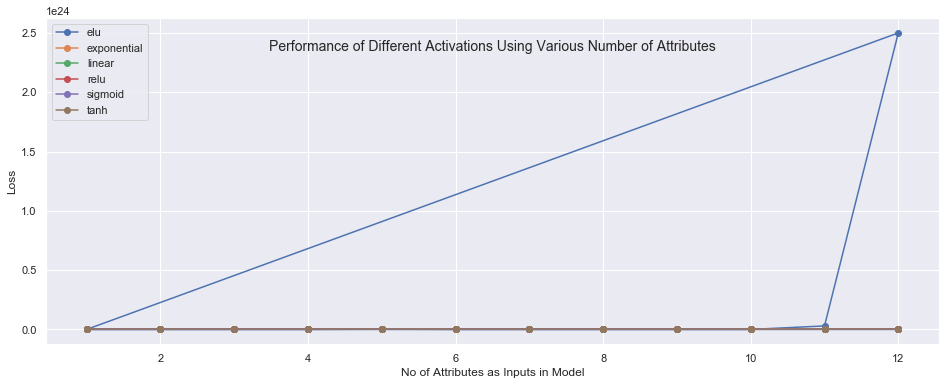

In [128]:
# Plot the actvations to see which performed best
plt.rcParams["figure.figsize"] = [16, 6]
groups = df.groupby(["activation"])

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for activation, group in groups:
    ax.plot(group["no_attrib"], group["loss"], marker='.', linestyle='-', ms=12, label=activation)
ax.legend()
ax.set_ylabel("Loss")
ax.set_xlabel("No of Attributes as Inputs in Model")
ax.text(.5,.9,"Performance of Different Activations Using Various Number of Attributes", horizontalalignment='center',transform=ax.transAxes,fontsize=14)

Text(0.5, 0.9, 'Performance of Different Optimiser Using Various Number of Attributes')

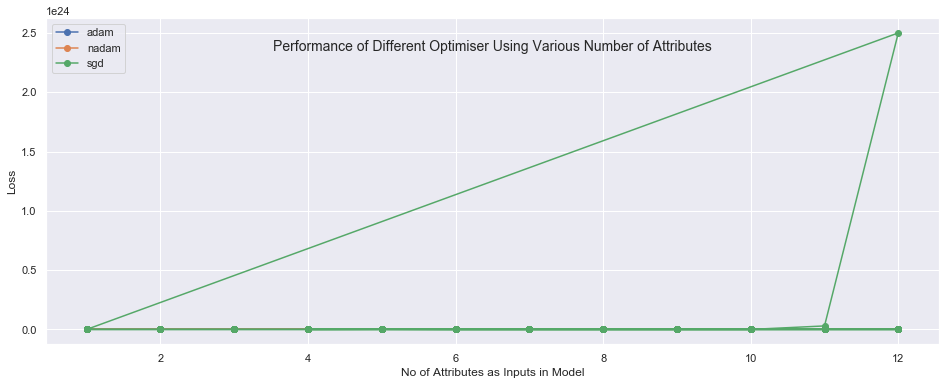

In [129]:
# Plot the actvations to see which performed best
plt.rcParams["figure.figsize"] = [16, 6]
groups = df.groupby('optimiser')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for optimiser, group in groups:
    ax.plot(group["no_attrib"], group["loss"], marker='.', linestyle='-', ms=12, label=optimiser)
ax.legend()
ax.set_ylabel("Loss")
ax.set_xlabel("No of Attributes as Inputs in Model")
ax.text(.5,.9,"Performance of Different Optimiser Using Various Number of Attributes", horizontalalignment='center',transform=ax.transAxes,fontsize=14)

In [130]:
# Sort the various model iterations according to loss to determine the best model(s) to chose) 
df.sort_values(by='loss', ascending=True)

,no_attrib,pre_process,test_size,activation,optimiser,no_epochs,batch_size,loss
467,12,whitened,0.3,sigmoid,sgd,100,10,7.593348e+00
633,10,whitened,0.3,elu,nadam,100,10,7.795660e+00
251,12,scaled,0.3,sigmoid,sgd,100,10,8.372111e+00
249,10,scaled,0.3,sigmoid,sgd,100,10,8.745815e+00
462,7,whitened,0.3,sigmoid,sgd,100,10,9.224508e+00
704,9,whitened,0.3,elu,sgd,100,10,9.278309e+00
515,12,whitened,0.3,relu,adam,100,10,9.599085e+00
370,11,scaled,0.3,relu,nadam,100,10,9.635691e+00
441,10,whitened,0.3,relu,sgd,100,10,9.717100e+00
679,8,whitened,0.3,sigmoid,sgd,100,10,9.782355e+00
